<H2> Working on Hyperparameter tunings of all Supervised Machine Learning Alogorithms On Telco Customer Churn - Focused Customer Retention Programs <H2>

### In this Notebook, We are performing Machine Learning Algorithms on Classification as stated below.

     1. Logistic Regression
     2. KNN Classification
     3. Support Vector Machine 
     4. Decision Tree
     5. Random Forest 

## STEP - I: BASIC PANDAS OPERATION

### IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### READING THE CSV FILE 

In [2]:
df = pd.read_csv(r'Downloads/churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### CHECKING THE SHAPE OF THE DATAFRAME

In [3]:
df.shape

(7043, 21)

### APPLYING info( ) FUNCTION & OBSERVING THE DTYPES ALONG WITH MISSING VALUES

### info() function: This is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### DESCRIBE( ) FUNCTION: The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## STEP - II: CLEANING THE DATA

### Observing that all the Object columns have two values - "Yes" and "No".

### LOC[ ] FUNCTION: The loc property is used to access a group of rows and columns by label(s) or a boolean array. It's primarily label based, but may also be used with a boolean array.

In [6]:
df.loc[:, ['Partner', 'Dependents', 'PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 
           'StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No,Yes,No,No,No,No,Yes,No
1,No,No,Yes,Yes,No,Yes,No,No,No,No,No
2,No,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes
3,No,No,No,Yes,No,Yes,Yes,No,No,No,No
4,No,No,Yes,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No
7040,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No
7041,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes


### Converting all the "Yes" to '1' and "No" to '0'

In [7]:
var = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for feature in var:
    df[feature] = df[feature].apply(lambda x : 1 if x=='Yes' else 0)
    
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


###  HAVING A LOOK OF ALL THE DATAFRAME COLUMNS AGAIN

In [8]:
df.loc[:, ['Partner', 'Dependents', 'PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 
           'StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,1,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,1,1
3,0,0,0,1,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,1,1,1,1,0
7039,1,1,1,0,1,1,0,1,1,1,0
7040,1,1,0,1,0,0,0,0,0,1,0
7041,1,0,1,0,0,0,0,0,0,1,1


### OBSERVING ALL THE COLUMNS WHETHER ALL THE COLUMNS ARE CONVERTED FROM OBJECT TO INT64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


### CHECKING ALL THE OBJECT DTYPES - HERE WE HAVE MORE THAN 2 CATEGORIES

In [10]:
df.loc[:5, ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']]

,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,No phone service,DSL,Month-to-month,Electronic check,29.85
1,No,DSL,One year,Mailed check,1889.5
2,No,DSL,Month-to-month,Mailed check,108.15
3,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,No,Fiber optic,Month-to-month,Electronic check,151.65
5,Yes,Fiber optic,Month-to-month,Electronic check,820.5


### SEPERATING THE OBJECT COLUMNS

In [11]:
df.select_dtypes(include = ['object'])

,customerID,gender,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,No phone service,DSL,Month-to-month,Electronic check,29.85
1,5575-GNVDE,Male,No,DSL,One year,Mailed check,1889.5
2,3668-QPYBK,Male,No,DSL,Month-to-month,Mailed check,108.15
3,7795-CFOCW,Male,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,Fiber optic,Month-to-month,Electronic check,151.65
...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,DSL,One year,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Fiber optic,One year,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,No phone service,DSL,Month-to-month,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,Fiber optic,Month-to-month,Mailed check,306.6


### SINCE TOTALCHARGES ARE IN OBJECT TYPE, NOW CONVERTING IT INTO FLOAT64

In [12]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

df.info()

ValueError: could not convert string to float: ''

### LETS SEE WHAT HAPPENED WITH THE TOTALCHARGES

In [ ]:
df['TotalCharges'].value_counts()

### LOOKING AT ALL THE 11 NULL VALUES

In [13]:
df.loc[df.TotalCharges == '', :]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### CONVERTING EMPTY STRING IN TOTALCHARGES TO NaN

In [14]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : np.NaN if x==' ' else float(x))

### NOW LETS OBSERVE THE DATAFRAME

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


### Observation:
TotalCharges has 11 missing values

### DROPPING THE CUSTOMERID

In [16]:
df = df.drop('customerID', axis = 1)

df.shape

(7043, 20)

### GETTING ALL THE OBJECT DTYPES

In [17]:
df_categorical = df.select_dtypes(include = ['object'])

df_categorical

,gender,MultipleLines,InternetService,Contract,PaymentMethod
0,Female,No phone service,DSL,Month-to-month,Electronic check
1,Male,No,DSL,One year,Mailed check
2,Male,No,DSL,Month-to-month,Mailed check
3,Male,No phone service,DSL,One year,Bank transfer (automatic)
4,Female,No,Fiber optic,Month-to-month,Electronic check
...,...,...,...,...,...
7038,Male,Yes,DSL,One year,Mailed check
7039,Female,Yes,Fiber optic,One year,Credit card (automatic)
7040,Female,No phone service,DSL,Month-to-month,Electronic check
7041,Male,Yes,Fiber optic,Month-to-month,Mailed check


### ENCODING THE CATEGORICAL DATA USING "ONE HOT ENCODER"

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop = 'first', sparse = False)

# column names are (annoyingly) lost after OneHotEncoding (i.e. the dataframe is converted to a numpy ndarray)

df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), columns = encoder.get_feature_names(df_categorical.columns))

df_encoded

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
df.shape

(7043, 20)

In [20]:
df = pd.concat([df, df_encoded], axis = 1)

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,No phone service,DSL,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,0,0,0,34,1,No,DSL,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Male,0,0,0,2,1,No,DSL,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,0,0,0,45,0,No phone service,DSL,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,1,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,Female,0,1,1,72,1,Yes,Fiber optic,0,1,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,Female,0,1,1,11,0,No phone service,DSL,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,Male,1,1,0,4,1,Yes,Fiber optic,0,0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   object 
 7   InternetService                        7043 non-null   object 
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

In [22]:
df_categorical.columns

Index(['gender', 'MultipleLines', 'InternetService', 'Contract',
       'PaymentMethod'],
      dtype='object')

In [23]:
df = df.drop(df_categorical.columns, axis = 1)
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,0,1,1,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0,1,1,72,1,0,1,1,0,1,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0,1,1,11,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,0,4,1,0,0,0,0,0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   OnlineSecurity                         7043 non-null   int64  
 6   OnlineBackup                           7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

### OUTLIERS: An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

In [25]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
var = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[var].describe(percentiles = [.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


### MISSING VALUES: Missing data (or) missing values, occur when no data value is stored for the variable in an observation. Sometimes missing values are caused by the researcher.

#### For example, when data collection is done improperly or mistakes are made in data entry.

- In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as NaN. 
- Values with a NaN value are ignored from operations like sum, count, etc.  
- Running the example prints the number of missing values in each column.

In [27]:
df.isnull().sum()

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (autom

In [28]:
df = df[~np.isnan(df['TotalCharges'])]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   int64  
 6   OnlineBackup                           7032 non-null   int64  
 7   DeviceProtection                       7032 non-null   int64  
 8   TechSupport                            7032 non-null   int64  
 9   StreamingTV                            7032 non-null   int64  
 10  StreamingMovies                        7032 non-null   int64  
 11  Pape

### FREQUENCY OF THE MISSINGS(RELATIVE)

In [30]:
sum(df['Churn'])/len(df['Churn'].index)*100

26.578498293515356

### VALUE_COUNTS( ): It Returns a Series containing counts of unique rows in the DataFrame.

In [31]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

#### NOTE: Churn ''Yes'' are '1' and ''No'' are '0'

### - As we Observe that 26.5% datapoints belong to one class & the rest all belongs to other class which Clearly states that the dataset is having high imbalance.

#### So, Now we shall go for undersampling

### UNDERSAMPLING: In Simple terms, sampling at a lower rate than normal.

Undersampling refers to a group of techniques designed to balance the class distribution for a classification dataset that has a skewed class distribution. Undersampling methods can be used directly on a training dataset that can, in turn, be used to fit a machine learning model.

In [32]:
df = df.sample(frac = 1)

# amount of fraud classes 492 rows.
churn_df = df.loc[df['Churn'] == 1]
non_churn_df = df.loc[df['Churn'] == 0][:1869]

normal_distributed_df = pd.concat([churn_df, non_churn_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac = 1, random_state = 42)

new_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2900,1,1,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6085,0,0,0,3,1,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6660,0,1,0,1,1,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2948,1,1,0,41,1,0,0,1,0,1,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5810,0,1,1,17,1,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,0,0,0,45,1,0,0,1,1,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3136,0,0,0,17,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6012,0,1,1,5,1,0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2353,0,0,0,3,1,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
new_df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [34]:
X = new_df.drop('Churn', axis = 1)
y = new_df['Churn']

In [35]:
y

2900    1
6085    1
6660    1
2948    1
5810    1
       ..
730     1
3136    1
6012    1
2353    0
1978    0
Name: Churn, Length: 3738, dtype: int64

### STEP - III: DATA PREPROCESSING - STANDARDIZING THE DATA

### STANDARDIZATION: Data standardization is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1(unit variance). Standardization assumes that your data has a Gaussian (bell curve) distribution.

In [36]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(3738, 24)


### STEP - IV: TRAIN-TEST SPLIT

### TRAIN-TEST SPLIT EVALUATION: The train-test split is a technique for evaluating the performance of a machine learning algorithm. It can be used for classification or regression problems and can be used for any supervised learning algorithm. 

### Test Dataset: Used to evaluate the fit machine learning model.

#### We are performing 80-20 split for the dataset provided

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standardized_data, y, train_size = 0.20, random_state = 0)

### STEP - V: MODEL BUILDING 

- Machine learning consists of algorithms that can automate analytical model building. 
- Using algorithms that iteratively learn from data, machine learning models facilitate computers to find hidden insights from Big Data without being explicitly programmed where to look.

### 1. LOGISTIC REGRESSION: 

- Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.
- The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. 
- Mathematically, a logistic regression model predicts P(Y=1) as a function of X.

### TRAINING THE MODEL

- The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from. 
- The term ML model refers to the model artifact that is created by the training process.
- Now we can use the ML model to get predictions on new data for which we don't know the target.

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

### PREDICTING THE MODEL 

- Predictive modeling is a commonly used statistical technique to predict future behavior. 
- Predictive modeling solutions are a form of data-mining technology that works by analyzing historical and current data and generating a model to help predict future outcomes.

In [39]:
y_pred = classifier.predict(X_test)

### EVALUATING THE MODEL

- Model evaluation aims to estimate the generalization accuracy of a model on future (unseen/out-of-sample) data. 
- Methods for evaluating a model's performance are divided into 2 categories: namely, holdout and Cross-validation.
- Both methods use a test set (i.e data not seen by the model) to evaluate model performance.

### What are the evaluation metrics for classification?

The key classification metrics are: 

- Accuracy.
- Confusion Matrix.
- Precision.
- Recall.
- F1- Score.
- ROC-AUC curve.

#### CALCULATING THE "ACCURACY" OF THE CLASS PREDICTIONS

In [40]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7606151788699431

### HYPERPARAMETER: A Hyperparameter is a parameter whose value is used to control the learning process.

- Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.
- By contrast, the values of other parameters (typically node weights) are learned.

#### What is the importance of Hyperparameter tuning? 

- Hyperparameters are crucial as they control the overall behaviour of a machine learning model. 
- The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.

#### Which strategy is used for tuning Hyperparameters?

- We'll explore three different methods of optimizing hyperparameters: Grid Search, Random Search and Bayesian optimization. 
- There are other potential strategies, but many of these require too many function evaluations per optimization to be feasible.

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [42]:
import warnings
warnings.filterwarnings('ignore')

### GridSearchCV: It is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
- In addition to that, you can specify the number of times for the cross-validation for each set of hyperparameters.

#### Why do we use?
- GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. 
- Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### NOTE: In general, the fold value in gridsearchcv is taken as 5 by default.

### ACCURACY: It is a metric for evaluating classification models. 

- Informally, accuracy is the fraction of predictions our model got right. 
- Formally, accuracy has the following definition: Accuracy = Number of correct predictions Total number of predictions.

In [43]:
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1, 10, 100, 1000],
                     'penalty':['l1','l2','elasticnet']}]

clf = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'accuracy')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=1, solver='newton-cg')

0.7602808425275828


In [44]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [45]:
print(clf.cv_results_['split0_test_score'])

[       nan        nan 0.78              nan 0.77333333 0.77333333
 0.77333333 0.77333333 0.77333333 0.77333333        nan        nan
        nan        nan        nan        nan        nan 0.75333333
        nan 0.76666667 0.75333333 0.75333333 0.75333333 0.76666667
 0.76666667        nan        nan        nan        nan        nan
        nan        nan 0.77333333        nan 0.76666667 0.77333333
 0.77333333 0.77333333 0.75333333 0.76666667        nan        nan
        nan        nan        nan        nan        nan 0.77333333
        nan 0.76666667 0.77333333 0.77333333 0.77333333 0.75333333
 0.76666667        nan        nan        nan        nan        nan]


In [46]:
print(clf.cv_results_['split1_test_score'])

[       nan        nan 0.75333333        nan 0.76       0.75333333
 0.75333333 0.75333333 0.75333333 0.75333333        nan        nan
        nan        nan        nan        nan        nan 0.75333333
        nan 0.75333333 0.75333333 0.75333333 0.75333333 0.75333333
 0.75333333        nan        nan        nan        nan        nan
        nan        nan 0.75333333        nan 0.75333333 0.75333333
 0.75333333 0.75333333 0.75333333 0.75333333        nan        nan
        nan        nan        nan        nan        nan 0.75333333
        nan 0.75333333 0.75333333 0.75333333 0.75333333 0.75333333
 0.75333333        nan        nan        nan        nan        nan]


In [47]:
print(clf.cv_results_['split2_test_score'])

[       nan        nan 0.69127517        nan 0.69127517 0.69798658
 0.69798658 0.69798658 0.69798658 0.69798658        nan        nan
        nan        nan        nan        nan        nan 0.69798658
        nan 0.69798658 0.69798658 0.69798658 0.69798658 0.69798658
 0.69798658        nan        nan        nan        nan        nan
        nan        nan 0.69798658        nan 0.69798658 0.69798658
 0.69798658 0.69798658 0.69798658 0.69798658        nan        nan
        nan        nan        nan        nan        nan 0.69798658
        nan 0.69798658 0.69798658 0.69798658 0.69798658 0.69798658
 0.69798658        nan        nan        nan        nan        nan]


In [48]:
print(clf.cv_results_['split3_test_score'])

[       nan        nan 0.79194631        nan 0.79194631 0.79865772
 0.79865772 0.79865772 0.79865772 0.79865772        nan        nan
        nan        nan        nan        nan        nan 0.79194631
        nan 0.79194631 0.79194631 0.79194631 0.79194631 0.79194631
 0.79194631        nan        nan        nan        nan        nan
        nan        nan 0.79194631        nan 0.79194631 0.79194631
 0.79194631 0.79194631 0.79194631 0.79194631        nan        nan
        nan        nan        nan        nan        nan 0.79194631
        nan 0.79194631 0.79194631 0.79194631 0.79194631 0.79194631
 0.79194631        nan        nan        nan        nan        nan]


In [49]:
print(clf.cv_results_['split4_test_score'])

[       nan        nan 0.71812081        nan 0.71812081 0.72483221
 0.72483221 0.72483221 0.72483221 0.72483221        nan        nan
        nan        nan        nan        nan        nan 0.71812081
        nan 0.71812081 0.71812081 0.71812081 0.71812081 0.71812081
 0.71812081        nan        nan        nan        nan        nan
        nan        nan 0.71812081        nan 0.71812081 0.71812081
 0.71812081 0.71812081 0.71812081 0.71812081        nan        nan
        nan        nan        nan        nan        nan 0.71812081
        nan 0.71812081 0.71812081 0.71812081 0.71812081 0.71812081
 0.71812081        nan        nan        nan        nan        nan]


### CONFUSION MATRIX:A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.  The rows represent the predicted values of the target variable.

- A confusion matrix is a technique for summarizing the performance of a classification algorithm. 
- Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.
- It is a useful machine learning method which allows you to measure Recall, Precision, Accuracy, and AUC-ROC curve.

#### Why is it called confusion matrix?

- Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class (or vice versa). 

- The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

#### Why do we need Confusion Matrix?

- Confusion matrices are used to visualize important predictive analytics like recall, specificity, accuracy, and precision.

- Confusion matrices are useful because they give direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives.

#### What is the main benefit of plotting the Confusion Matrix of a Classification Model?
- Confusion matrix shows how any classification model is confused when it makes predictions. 
- Confusion matrix not only gives you insight into the errors being made by your classifier but also types of errors that are being made.

### NOTE: A good Confusion matrix (model) will have large values across the diagonal and small values off the diagonal.

In [50]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[1096,  397],
       [ 319, 1179]], dtype=int64)

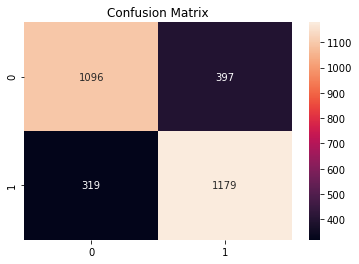

In [51]:
sns.heatmap(con_metric, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.show()

### PRECISION:  Also called positive predictive value. Precision is something made with exact measurements. It is  used or intended for accurate or exact measurement.

- In pattern recognition, information retrieval and classification (machine learning), it is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved.

In [52]:
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1, 10, 100, 1000],
                     'penalty':['l1','l2','elasticnet']}]

clf = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'precision')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=1, solver='newton-cg')

0.7479365079365079


In [53]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [54]:
print(clf.cv_results_['split0_test_score'])

[       nan        nan 0.76623377        nan 0.76315789 0.75641026
 0.75641026 0.75641026 0.75641026 0.75641026        nan        nan
        nan        nan        nan        nan        nan 0.73417722
        nan 0.75324675 0.73417722 0.73417722 0.73417722 0.75324675
 0.75324675        nan        nan        nan        nan        nan
        nan        nan 0.75641026        nan 0.75324675 0.75641026
 0.75641026 0.75641026 0.73417722 0.75324675        nan        nan
        nan        nan        nan        nan        nan 0.75641026
        nan 0.75324675 0.75641026 0.75641026 0.75641026 0.73417722
 0.75324675        nan        nan        nan        nan        nan]


In [55]:
print(clf.cv_results_['split1_test_score'])

[       nan        nan 0.71111111        nan 0.71910112 0.71111111
 0.71111111 0.71111111 0.71111111 0.71111111        nan        nan
        nan        nan        nan        nan        nan 0.71111111
        nan 0.71111111 0.71111111 0.71111111 0.71111111 0.71111111
 0.71111111        nan        nan        nan        nan        nan
        nan        nan 0.70652174        nan 0.71111111 0.70652174
 0.70652174 0.70652174 0.71111111 0.71111111        nan        nan
        nan        nan        nan        nan        nan 0.70652174
        nan 0.71111111 0.70652174 0.70652174 0.70652174 0.71111111
 0.71111111        nan        nan        nan        nan        nan]


In [56]:
print(clf.cv_results_['split2_test_score'])

[       nan        nan 0.65555556        nan 0.65555556 0.66292135
 0.66292135 0.66292135 0.66292135 0.66292135        nan        nan
        nan        nan        nan        nan        nan 0.65555556
        nan 0.66292135 0.66292135 0.66292135 0.66292135 0.66292135
 0.66292135        nan        nan        nan        nan        nan
        nan        nan 0.66292135        nan 0.66292135 0.66292135
 0.66292135 0.66292135 0.66292135 0.66292135        nan        nan
        nan        nan        nan        nan        nan 0.66292135
        nan 0.66292135 0.66292135 0.66292135 0.66292135 0.66292135
 0.66292135        nan        nan        nan        nan        nan]


In [57]:
print(clf.cv_results_['split3_test_score'])

[       nan        nan 0.8028169         nan 0.8028169  0.81428571
 0.81428571 0.81428571 0.81428571 0.81428571        nan        nan
        nan        nan        nan        nan        nan 0.8028169
        nan 0.8028169  0.8028169  0.8028169  0.8028169  0.8028169
 0.8028169         nan        nan        nan        nan        nan
        nan        nan 0.8028169         nan 0.8028169  0.8028169
 0.8028169  0.8028169  0.8028169  0.8028169         nan        nan
        nan        nan        nan        nan        nan 0.8028169
        nan 0.8028169  0.8028169  0.8028169  0.8028169  0.8028169
 0.8028169         nan        nan        nan        nan        nan]


In [58]:
print(clf.cv_results_['split4_test_score'])

[       nan        nan 0.71621622        nan 0.71621622 0.7260274
 0.7260274  0.7260274  0.7260274  0.7260274         nan        nan
        nan        nan        nan        nan        nan 0.71621622
        nan 0.71621622 0.71621622 0.71621622 0.71621622 0.71621622
 0.71621622        nan        nan        nan        nan        nan
        nan        nan 0.70666667        nan 0.71621622 0.71621622
 0.71621622 0.71621622 0.71621622 0.71621622        nan        nan
        nan        nan        nan        nan        nan 0.71621622
        nan 0.71621622 0.71621622 0.71621622 0.71621622 0.71621622
 0.71621622        nan        nan        nan        nan        nan]


### RECALL: Recall literally is how many of the true positives were recalled (found), i.e. how many of the correct hits were also found. 

- Precision (your formula is incorrect) is how many of the returned hits were true positive i.e. how many of the found were correct hits. It's pretty straightforward, actually.

##### NOTE: "A perfect classifier has precision and recall both equal to 1".

In [59]:
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1, 10, 100, 1000],
                     'penalty':['l1','l2','elasticnet']}]

clf = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'recall')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=100, penalty='l1', solver='liblinear')

0.7903871829105474


In [60]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [61]:
print(clf.cv_results_['split0_test_score'])

[       nan        nan 0.7972973         nan 0.78378378 0.7972973
 0.7972973  0.7972973  0.7972973  0.7972973         nan        nan
        nan        nan        nan        nan        nan 0.78378378
        nan 0.78378378 0.78378378 0.78378378 0.78378378 0.78378378
 0.78378378        nan        nan        nan        nan        nan
        nan        nan 0.7972973         nan 0.78378378 0.7972973
 0.7972973  0.7972973  0.78378378 0.78378378        nan        nan
        nan        nan        nan        nan        nan 0.7972973
        nan 0.78378378 0.7972973  0.7972973  0.7972973  0.78378378
 0.78378378        nan        nan        nan        nan        nan]


In [62]:
print(clf.cv_results_['split1_test_score'])

[       nan        nan 0.85333333        nan 0.85333333 0.85333333
 0.85333333 0.85333333 0.85333333 0.85333333        nan        nan
        nan        nan        nan        nan        nan 0.85333333
        nan 0.85333333 0.85333333 0.85333333 0.85333333 0.85333333
 0.85333333        nan        nan        nan        nan        nan
        nan        nan 0.86666667        nan 0.85333333 0.86666667
 0.86666667 0.86666667 0.85333333 0.85333333        nan        nan
        nan        nan        nan        nan        nan 0.86666667
        nan 0.85333333 0.86666667 0.86666667 0.86666667 0.85333333
 0.85333333        nan        nan        nan        nan        nan]


In [63]:
print(clf.cv_results_['split2_test_score'])

[      nan       nan 0.7972973       nan 0.7972973 0.7972973 0.7972973
 0.7972973 0.7972973 0.7972973       nan       nan       nan       nan
       nan       nan       nan 0.7972973       nan 0.7972973 0.7972973
 0.7972973 0.7972973 0.7972973 0.7972973       nan       nan       nan
       nan       nan       nan       nan 0.7972973       nan 0.7972973
 0.7972973 0.7972973 0.7972973 0.7972973 0.7972973       nan       nan
       nan       nan       nan       nan       nan 0.7972973       nan
 0.7972973 0.7972973 0.7972973 0.7972973 0.7972973 0.7972973       nan
       nan       nan       nan       nan]


In [64]:
print(clf.cv_results_['split3_test_score'])

[       nan        nan 0.77027027        nan 0.77027027 0.77027027
 0.77027027 0.77027027 0.77027027 0.77027027        nan        nan
        nan        nan        nan        nan        nan 0.77027027
        nan 0.77027027 0.77027027 0.77027027 0.77027027 0.77027027
 0.77027027        nan        nan        nan        nan        nan
        nan        nan 0.77027027        nan 0.77027027 0.77027027
 0.77027027 0.77027027 0.77027027 0.77027027        nan        nan
        nan        nan        nan        nan        nan 0.77027027
        nan 0.77027027 0.77027027 0.77027027 0.77027027 0.77027027
 0.77027027        nan        nan        nan        nan        nan]


In [65]:
print(clf.cv_results_['split4_test_score'])

[       nan        nan 0.71621622        nan 0.71621622 0.71621622
 0.71621622 0.71621622 0.71621622 0.71621622        nan        nan
        nan        nan        nan        nan        nan 0.71621622
        nan 0.71621622 0.71621622 0.71621622 0.71621622 0.71621622
 0.71621622        nan        nan        nan        nan        nan
        nan        nan 0.71621622        nan 0.71621622 0.71621622
 0.71621622 0.71621622 0.71621622 0.71621622        nan        nan
        nan        nan        nan        nan        nan 0.71621622
        nan 0.71621622 0.71621622 0.71621622 0.71621622 0.71621622
 0.71621622        nan        nan        nan        nan        nan]


### F1 SCORE: The F1 score, also called the F score (or) F measure, is a measure of a test's accuracy. 

- The F1 score is defined as the weighted harmonic mean of the test's precision and recall.
- Mathematically, The F1 Score is the 2*((precision*recall)/(precision+recall)).

In [66]:
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1, 10, 100, 1000],
                     'penalty':['l1','l2','elasticnet']}]

clf = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=1, solver='newton-cg')

0.7666775138301334


In [67]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [68]:
print(clf.cv_results_['split0_test_score'])

[       nan        nan 0.78145695        nan 0.77333333 0.77631579
 0.77631579 0.77631579 0.77631579 0.77631579        nan        nan
        nan        nan        nan        nan        nan 0.75816993
        nan 0.76821192 0.75816993 0.75816993 0.75816993 0.76821192
 0.76821192        nan        nan        nan        nan        nan
        nan        nan 0.77631579        nan 0.76821192 0.77631579
 0.77631579 0.77631579 0.75816993 0.76821192        nan        nan
        nan        nan        nan        nan        nan 0.77631579
        nan 0.76821192 0.77631579 0.77631579 0.77631579 0.75816993
 0.76821192        nan        nan        nan        nan        nan]


In [69]:
print(clf.cv_results_['split1_test_score'])

[       nan        nan 0.77575758        nan 0.7804878  0.77575758
 0.77575758 0.77575758 0.77575758 0.77575758        nan        nan
        nan        nan        nan        nan        nan 0.77575758
        nan 0.77575758 0.77575758 0.77575758 0.77575758 0.77575758
 0.77575758        nan        nan        nan        nan        nan
        nan        nan 0.77844311        nan 0.77575758 0.77844311
 0.77844311 0.77844311 0.77575758 0.77575758        nan        nan
        nan        nan        nan        nan        nan 0.77844311
        nan 0.77575758 0.77844311 0.77844311 0.77844311 0.77575758
 0.77575758        nan        nan        nan        nan        nan]


In [70]:
print(clf.cv_results_['split2_test_score'])

[       nan        nan 0.7195122         nan 0.7195122  0.72392638
 0.72392638 0.72392638 0.72392638 0.72392638        nan        nan
        nan        nan        nan        nan        nan 0.72392638
        nan 0.72392638 0.72392638 0.72392638 0.72392638 0.72392638
 0.72392638        nan        nan        nan        nan        nan
        nan        nan 0.72392638        nan 0.72392638 0.72392638
 0.72392638 0.72392638 0.72392638 0.72392638        nan        nan
        nan        nan        nan        nan        nan 0.72392638
        nan 0.72392638 0.72392638 0.72392638 0.72392638 0.72392638
 0.72392638        nan        nan        nan        nan        nan]


In [71]:
print(clf.cv_results_['split3_test_score'])

[       nan        nan 0.7862069         nan 0.7862069  0.79166667
 0.79166667 0.79166667 0.79166667 0.79166667        nan        nan
        nan        nan        nan        nan        nan 0.7862069
        nan 0.7862069  0.7862069  0.7862069  0.7862069  0.7862069
 0.7862069         nan        nan        nan        nan        nan
        nan        nan 0.7862069         nan 0.7862069  0.7862069
 0.7862069  0.7862069  0.7862069  0.7862069         nan        nan
        nan        nan        nan        nan        nan 0.7862069
        nan 0.7862069  0.7862069  0.7862069  0.7862069  0.7862069
 0.7862069         nan        nan        nan        nan        nan]


In [72]:
print(clf.cv_results_['split4_test_score'])

[       nan        nan 0.71621622        nan 0.71621622 0.72108844
 0.72108844 0.72108844 0.72108844 0.72108844        nan        nan
        nan        nan        nan        nan        nan 0.71621622
        nan 0.71621622 0.71621622 0.71621622 0.71621622 0.71621622
 0.71621622        nan        nan        nan        nan        nan
        nan        nan 0.71621622        nan 0.71621622 0.71621622
 0.71621622 0.71621622 0.71621622 0.71621622        nan        nan
        nan        nan        nan        nan        nan 0.71621622
        nan 0.71621622 0.71621622 0.71621622 0.71621622 0.71621622
 0.71621622        nan        nan        nan        nan        nan]


### ROC-AUC CURVE (Receiver Operating Characteristic Curve - Area Under the ROC Curve): ROC is a probability curve and AUC represents the degree or measure of separability. 

- It tells how much the model is capable of distinguishing between classes.
- AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. 
- The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In [73]:
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1, 10, 100, 1000],
                     'penalty':['l1','l2','elasticnet']}]

clf = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'roc_auc')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
LogisticRegression(C=1, penalty='l1', solver='saga')

0.8413182300669704


In [74]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [75]:
print(clf.cv_results_['split0_test_score'])

[       nan        nan 0.85526316        nan 0.85579659 0.85384068
 0.85384068 0.85384068 0.85384068 0.85384068        nan        nan
        nan        nan        nan        nan        nan 0.84975107
        nan 0.8504623  0.85010669 0.85010669 0.8502845  0.85064011
 0.85064011        nan        nan        nan        nan        nan
        nan        nan 0.84495021        nan 0.8504623  0.8447724
 0.8447724  0.84495021 0.84992888 0.8504623         nan        nan
        nan        nan        nan        nan        nan 0.84495021
        nan 0.8502845  0.84566145 0.84566145 0.84566145 0.84975107
 0.8502845         nan        nan        nan        nan        nan]


In [76]:
print(clf.cv_results_['split1_test_score'])

[       nan        nan 0.84746667        nan 0.84764444 0.84817778
 0.84817778 0.848      0.84817778 0.848             nan        nan
        nan        nan        nan        nan        nan 0.84728889
        nan 0.84693333 0.848      0.848      0.848      0.84728889
 0.84675556        nan        nan        nan        nan        nan
        nan        nan 0.84568889        nan 0.8464     0.84586667
 0.84586667 0.84586667 0.84675556 0.8464            nan        nan
        nan        nan        nan        nan        nan 0.84551111
        nan 0.8464     0.84586667 0.84568889 0.84568889 0.84711111
 0.8464            nan        nan        nan        nan        nan]


In [77]:
print(clf.cv_results_['split2_test_score'])

[       nan        nan 0.81801802        nan 0.81801802 0.81801802
 0.81801802 0.81801802 0.81801802 0.81801802        nan        nan
        nan        nan        nan        nan        nan 0.8209009
        nan 0.8209009  0.82036036 0.82036036 0.82036036 0.82036036
 0.82126126        nan        nan        nan        nan        nan
        nan        nan 0.82036036        nan 0.82162162 0.8209009
 0.8209009  0.8209009  0.82126126 0.82162162        nan        nan
        nan        nan        nan        nan        nan 0.82018018
        nan 0.82162162 0.82072072 0.82072072 0.82072072 0.82126126
 0.82162162        nan        nan        nan        nan        nan]


In [78]:
print(clf.cv_results_['split3_test_score'])

[       nan        nan 0.8754955         nan 0.87567568 0.87513514
 0.87513514 0.87513514 0.87513514 0.87513514        nan        nan
        nan        nan        nan        nan        nan 0.8754955
        nan 0.8754955  0.87531532 0.87531532 0.87513514 0.8754955
 0.8754955         nan        nan        nan        nan        nan
        nan        nan 0.87585586        nan 0.8754955  0.87585586
 0.87567568 0.87585586 0.8754955  0.8754955         nan        nan
        nan        nan        nan        nan        nan 0.87567568
        nan 0.87567568 0.87567568 0.87567568 0.87567568 0.87531532
 0.87567568        nan        nan        nan        nan        nan]


In [79]:
print(clf.cv_results_['split4_test_score'])

[       nan        nan 0.7790991         nan 0.77945946 0.78072072
 0.7809009  0.78072072 0.78072072 0.78072072        nan        nan
        nan        nan        nan        nan        nan 0.77513514
        nan 0.7754955  0.77531532 0.77531532 0.77531532 0.7754955
 0.77585586        nan        nan        nan        nan        nan
        nan        nan 0.77621622        nan 0.77423423 0.77621622
 0.77621622 0.77621622 0.77459459 0.77423423        nan        nan
        nan        nan        nan        nan        nan 0.7763964
        nan 0.77405405 0.77657658 0.77657658 0.77657658 0.77477477
 0.77423423        nan        nan        nan        nan        nan]


### RandomizedSearchCV: RandomizedSearchCV implements a “fit” and a “score” method.

- Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. 
- It is similar to grid search, and yet it has proven to yield better results comparatively.
- In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.

#### Why do we use?

- So, In the GridSearchCV object searches for the best parameters and automatically fits a new model on the whole training dataset. 
- But, RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

### ACCURACY

In [80]:
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1, 10, 100, 1000],
                     'penalty':['l1','l2','elasticnet']}]

clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'accuracy')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'solver': 'sag', 'penalty': 'l2', 'C': 1}
LogisticRegression(C=1, solver='sag')

0.7602808425275828


In [81]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_solver', 'param_penalty', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [82]:
print(clf.cv_results_['split0_test_score'])

[0.75333333 0.75333333 0.76666667 0.77333333        nan        nan
        nan        nan 0.76666667 0.77333333]


In [83]:
print(clf.cv_results_['split1_test_score'])

[0.75333333 0.75333333 0.75333333 0.75333333        nan        nan
        nan        nan 0.75333333 0.75333333]


In [84]:
print(clf.cv_results_['split2_test_score'])

[0.69798658 0.69798658 0.69798658 0.69798658        nan        nan
        nan        nan 0.69798658 0.69798658]


In [85]:
print(clf.cv_results_['split3_test_score'])

[0.79194631 0.79194631 0.79194631 0.79865772        nan        nan
        nan        nan 0.79194631 0.79194631]


In [86]:
print(clf.cv_results_['split4_test_score'])

[0.71812081 0.71812081 0.71812081 0.72483221        nan        nan
        nan        nan 0.71812081 0.71812081]


### CONFUSION MATRIX

In [87]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[1096,  397],
       [ 319, 1179]], dtype=int64)

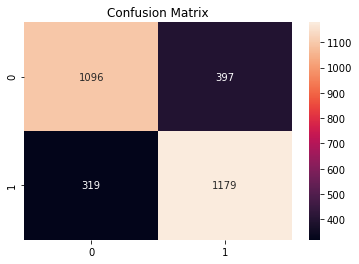

In [88]:
sns.heatmap(con_metric, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.show()

### PRECISION

In [89]:
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1, 10, 100, 1000],
                     'penalty':['l1','l2','elasticnet']}]

clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'precision')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'solver': 'sag', 'penalty': 'l2', 'C': 1}
LogisticRegression(C=1, solver='sag')

0.7479365079365079


In [90]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_solver', 'param_penalty', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [91]:
print(clf.cv_results_['split0_test_score'])

[0.75641026 0.75641026        nan        nan 0.75641026 0.75641026
 0.75641026        nan 0.75324675        nan]


In [92]:
print(clf.cv_results_['split1_test_score'])

[0.71111111 0.70652174        nan        nan 0.71111111 0.71111111
 0.70652174        nan 0.71111111        nan]


In [93]:
print(clf.cv_results_['split2_test_score'])

[0.66292135 0.66292135        nan        nan 0.66292135 0.66292135
 0.66292135        nan 0.66292135        nan]


In [94]:
print(clf.cv_results_['split3_test_score'])

[0.81428571 0.8028169         nan        nan 0.81428571 0.81428571
 0.8028169         nan 0.8028169         nan]


In [95]:
print(clf.cv_results_['split4_test_score'])

[0.7260274  0.71621622        nan        nan 0.7260274  0.7260274
 0.71621622        nan 0.71621622        nan]


### RECALL

In [96]:
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1, 10, 100, 1000],
                     'penalty':['l1','l2','elasticnet']}]

clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'recall')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1000}
LogisticRegression(C=1000)

0.7917222963951935


In [97]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_solver', 'param_penalty', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [98]:
print(clf.cv_results_['split0_test_score'])

[       nan        nan        nan 0.78378378        nan 0.78378378
 0.7972973  0.7972973  0.7972973  0.78378378]


In [99]:
print(clf.cv_results_['split1_test_score'])

[       nan        nan        nan 0.85333333        nan 0.85333333
 0.85333333 0.86666667 0.86666667 0.85333333]


In [100]:
print(clf.cv_results_['split2_test_score'])

[      nan       nan       nan 0.7972973       nan 0.7972973 0.7972973
 0.7972973 0.7972973 0.7972973]


In [101]:
print(clf.cv_results_['split3_test_score'])

[       nan        nan        nan 0.77027027        nan 0.77027027
 0.77027027 0.77027027 0.77027027 0.77027027]


In [102]:
print(clf.cv_results_['split4_test_score'])

[       nan        nan        nan 0.71621622        nan 0.71621622
 0.71621622 0.71621622 0.71621622 0.71621622]


### F1 SCORE:

In [103]:
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1, 10, 100, 1000],
                     'penalty':['l1','l2','elasticnet']}]

clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1000}
LogisticRegression(C=1000, solver='newton-cg')

0.7696301103179752


In [104]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_solver', 'param_penalty', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [105]:
print(clf.cv_results_['split0_test_score'])

[       nan 0.76821192        nan        nan        nan        nan
 0.77631579        nan        nan        nan]


In [106]:
print(clf.cv_results_['split1_test_score'])

[       nan 0.77575758        nan        nan        nan        nan
 0.77844311        nan        nan        nan]


In [107]:
print(clf.cv_results_['split2_test_score'])

[       nan 0.72392638        nan        nan        nan        nan
 0.72392638        nan        nan        nan]


In [108]:
print(clf.cv_results_['split3_test_score'])

[      nan 0.7862069       nan       nan       nan       nan 0.7862069
       nan       nan       nan]


In [109]:
print(clf.cv_results_['split4_test_score'])

[       nan 0.71621622        nan        nan        nan        nan
 0.71621622        nan        nan        nan]


### ROC-AUC 

In [110]:
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1, 10, 100, 1000],
                     'penalty':['l1','l2','elasticnet']}]

clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'roc_auc')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'solver': 'sag', 'penalty': 'l2', 'C': 1}
LogisticRegression(C=1, solver='sag')

0.8409963004926416


In [111]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_solver', 'param_penalty', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [112]:
print(clf.cv_results_['split0_test_score'])

[       nan        nan 0.85010669        nan 0.8502845         nan
        nan 0.85064011 0.85384068 0.8504623 ]


In [113]:
print(clf.cv_results_['split1_test_score'])

[       nan        nan 0.848             nan 0.8464            nan
        nan 0.84675556 0.84817778 0.84693333]


In [114]:
print(clf.cv_results_['split2_test_score'])

[       nan        nan 0.82036036        nan 0.82162162        nan
        nan 0.82108108 0.81801802 0.82054054]


In [115]:
print(clf.cv_results_['split3_test_score'])

[       nan        nan 0.87531532        nan 0.8754955         nan
        nan 0.8754955  0.87513514 0.8754955 ]


In [116]:
print(clf.cv_results_['split4_test_score'])

[       nan        nan 0.77531532        nan 0.77459459        nan
        nan 0.77585586 0.78072072 0.7754955 ]


## For the Logistic Regression, The Hyperparameter Tuning Values are as follows:

### GridSearchCV                                               

    1. Accuracy: 0.7602808425275828                          
    2. Confusion Matrix: array([[1096,  397],  [ 319, 1179]], dtype=int64)
    3. Precision: 0.7479365079365079
    4. Recall: 0.7903871829105474
    5. F1-Score: 0.7666775138301334
    6. ROC-AUC: 0.8413182300669704
    
### RandomizedSearchCV   

    1. Accuracy: 0.7602808425275828
    2. Confusion Matrix: array([[1096,  397],  [ 319, 1179]], dtype=int64)
    3. Precision: 0.7479365079365079
    4. Recall: 0.7917222963951935
    5. F1-Score: 0.7696301103179752
    6. ROC-AUC: 0.8409963004926416

### 2. KNN CLASSIFICATION: 

- K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning for regression and classification problem. 
- KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). 
- Classification is done by a majority vote to its neighbors.

### TRAINING THE MODEL

In [117]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### PREDICTING THE MODEL

In [118]:
y_pred = classifier.predict(X_test)

### EVALUATING THE MODEL USING HYPERPARAMETERS BY GRIDSEARCHCV

### ACCURACY

In [119]:
tuned_parameters = [{'n_neighbors' : [1, 2, 3, 4, 5, 6, 7], 'p' : [1, 2, 3, 4]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring = 'accuracy')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'n_neighbors': 7, 'p': 3}
KNeighborsClassifier(n_neighbors=7, p=3)

0.7295218990304246


In [120]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_p', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [121]:
print(clf.cv_results_['split0_test_score'])

[0.72       0.72       0.72666667 0.72666667 0.66       0.67333333
 0.65333333 0.68666667 0.77333333 0.77333333 0.75333333 0.76
 0.76       0.74       0.74666667 0.74666667 0.73333333 0.75333333
 0.74666667 0.74       0.72666667 0.74666667 0.74666667 0.74
 0.73333333 0.74       0.76       0.76666667]


In [122]:
print(clf.cv_results_['split1_test_score'])

[0.68666667 0.67333333 0.68666667 0.69333333 0.7        0.72
 0.70666667 0.68       0.75333333 0.72       0.69333333 0.7
 0.75333333 0.75333333 0.74666667 0.73333333 0.73333333 0.74666667
 0.76       0.75333333 0.74       0.76666667 0.76666667 0.77333333
 0.75333333 0.76       0.75333333 0.75333333]


In [123]:
print(clf.cv_results_['split2_test_score'])

[0.70469799 0.69127517 0.68456376 0.70469799 0.68456376 0.65771812
 0.67114094 0.67114094 0.65100671 0.66442953 0.6442953  0.6442953
 0.65771812 0.65771812 0.65771812 0.65100671 0.66442953 0.63758389
 0.63758389 0.65771812 0.65771812 0.65100671 0.6442953  0.65771812
 0.66442953 0.67114094 0.68456376 0.67114094]


In [124]:
print(clf.cv_results_['split3_test_score'])

[0.70469799 0.70469799 0.67785235 0.67785235 0.67114094 0.67785235
 0.67114094 0.6442953  0.68456376 0.69798658 0.69798658 0.72483221
 0.72483221 0.69127517 0.69127517 0.7114094  0.73154362 0.73825503
 0.7114094  0.73825503 0.72483221 0.73154362 0.72483221 0.73825503
 0.73154362 0.7114094  0.76510067 0.75167785]


In [125]:
print(clf.cv_results_['split4_test_score'])

[0.6442953  0.6442953  0.65100671 0.65771812 0.61073826 0.60402685
 0.60402685 0.61073826 0.66442953 0.65771812 0.67114094 0.69127517
 0.67785235 0.68456376 0.69127517 0.70469799 0.69127517 0.69127517
 0.68456376 0.68456376 0.69127517 0.65771812 0.67785235 0.69798658
 0.67785235 0.68456376 0.68456376 0.70469799]


### CONFUSION MATRIX

In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[ 979,  514],
       [ 332, 1166]], dtype=int64)

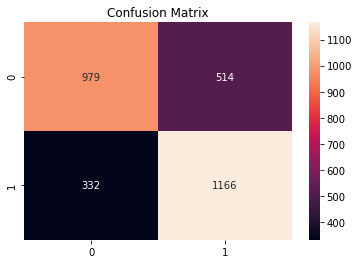

In [128]:
sns.heatmap(con_metric, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.show()

### PRECISION

In [129]:
tuned_parameters = [{'n_neighbors' : [1, 2, 3, 4, 5, 6, 7], 'p' : [1, 2, 3, 4]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring = 'precision')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'n_neighbors': 2, 'p': 3}
KNeighborsClassifier(n_neighbors=2, p=3)

0.7140255009107468


In [130]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_p', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [131]:
print(clf.cv_results_['split0_test_score'])

[0.70512821 0.70512821 0.7037037  0.69879518 0.74468085 0.76595745
 0.73913043 0.78723404 0.73809524 0.74390244 0.72839506 0.73170732
 0.796875   0.77777778 0.81034483 0.79032258 0.70238095 0.71264368
 0.71428571 0.71604938 0.7260274  0.73684211 0.73684211 0.73333333
 0.69318182 0.70588235 0.72619048 0.72941176]


In [132]:
print(clf.cv_results_['split1_test_score'])

[0.6627907  0.64772727 0.65909091 0.66292135 0.75       0.7704918
 0.76271186 0.74545455 0.70652174 0.67741935 0.65591398 0.66666667
 0.75675676 0.77142857 0.76056338 0.75362319 0.69230769 0.70786517
 0.72941176 0.71111111 0.725      0.73809524 0.75       0.75949367
 0.71111111 0.70967742 0.70652174 0.71111111]


In [133]:
print(clf.cv_results_['split2_test_score'])

[0.68292683 0.66666667 0.65882353 0.68292683 0.72131148 0.69491525
 0.72727273 0.72727273 0.62222222 0.63636364 0.61538462 0.61797753
 0.64935065 0.64935065 0.65333333 0.65277778 0.62       0.60869565
 0.61111111 0.63218391 0.63529412 0.63095238 0.62068966 0.63529412
 0.62244898 0.63157895 0.64516129 0.63736264]


In [134]:
print(clf.cv_results_['split3_test_score'])

[0.734375   0.734375   0.6969697  0.6969697  0.82051282 0.86111111
 0.87878788 0.81818182 0.69565217 0.72307692 0.72307692 0.73239437
 0.8        0.76923077 0.76923077 0.79245283 0.73611111 0.73972603
 0.71830986 0.75362319 0.76190476 0.75757576 0.75384615 0.76923077
 0.74285714 0.71830986 0.76       0.74025974]


In [135]:
print(clf.cv_results_['split4_test_score'])

[0.63636364 0.63636364 0.64473684 0.65333333 0.64814815 0.64150943
 0.64705882 0.66666667 0.66216216 0.64197531 0.65822785 0.67073171
 0.6969697  0.70149254 0.71875    0.7027027  0.66666667 0.66666667
 0.6626506  0.65517241 0.68421053 0.65333333 0.67105263 0.69333333
 0.65116279 0.65517241 0.65882353 0.67045455]


### RECALL

In [136]:
tuned_parameters = [{'n_neighbors' : [1, 2, 3, 4, 5, 6, 7], 'p' : [1, 2, 3, 4]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring = 'recall')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'n_neighbors': 7, 'p': 4}
KNeighborsClassifier(n_neighbors=7, p=4)

0.7950600801068091


In [137]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_p', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [138]:
print(clf.cv_results_['split0_test_score'])

[0.74324324 0.74324324 0.77027027 0.78378378 0.47297297 0.48648649
 0.45945946 0.5        0.83783784 0.82432432 0.7972973  0.81081081
 0.68918919 0.66216216 0.63513514 0.66216216 0.7972973  0.83783784
 0.81081081 0.78378378 0.71621622 0.75675676 0.75675676 0.74324324
 0.82432432 0.81081081 0.82432432 0.83783784]


In [139]:
print(clf.cv_results_['split1_test_score'])

[0.76       0.76       0.77333333 0.78666667 0.6        0.62666667
 0.6        0.54666667 0.86666667 0.84       0.81333333 0.8
 0.74666667 0.72       0.72       0.69333333 0.84       0.84
 0.82666667 0.85333333 0.77333333 0.82666667 0.8        0.8
 0.85333333 0.88       0.86666667 0.85333333]


In [140]:
print(clf.cv_results_['split2_test_score'])

[0.75675676 0.75675676 0.75675676 0.75675676 0.59459459 0.55405405
 0.54054054 0.54054054 0.75675676 0.75675676 0.75675676 0.74324324
 0.67567568 0.67567568 0.66216216 0.63513514 0.83783784 0.75675676
 0.74324324 0.74324324 0.72972973 0.71621622 0.72972973 0.72972973
 0.82432432 0.81081081 0.81081081 0.78378378]


In [141]:
print(clf.cv_results_['split3_test_score'])

[0.63513514 0.63513514 0.62162162 0.62162162 0.43243243 0.41891892
 0.39189189 0.36486486 0.64864865 0.63513514 0.63513514 0.7027027
 0.59459459 0.54054054 0.54054054 0.56756757 0.71621622 0.72972973
 0.68918919 0.7027027  0.64864865 0.67567568 0.66216216 0.67567568
 0.7027027  0.68918919 0.77027027 0.77027027]


In [142]:
print(clf.cv_results_['split4_test_score'])

[0.66216216 0.66216216 0.66216216 0.66216216 0.47297297 0.45945946
 0.44594595 0.43243243 0.66216216 0.7027027  0.7027027  0.74324324
 0.62162162 0.63513514 0.62162162 0.7027027  0.75675676 0.75675676
 0.74324324 0.77027027 0.7027027  0.66216216 0.68918919 0.7027027
 0.75675676 0.77027027 0.75675676 0.7972973 ]


### F1-SCORE 

In [143]:
tuned_parameters = [{'n_neighbors' : [1, 2, 3, 4, 5, 6, 7], 'p' : [1, 2, 3, 4]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring = 'f1')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'n_neighbors': 7, 'p': 4}
KNeighborsClassifier(n_neighbors=7, p=4)

0.7481155778894472


In [144]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_p', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [145]:
print(clf.cv_results_['split0_test_score'])

[0.72368421 0.72368421 0.73548387 0.7388535  0.5785124  0.59504132
 0.56666667 0.61157025 0.78481013 0.78205128 0.76129032 0.76923077
 0.73913043 0.71532847 0.71212121 0.72058824 0.74683544 0.77018634
 0.75949367 0.7483871  0.72108844 0.74666667 0.74666667 0.73825503
 0.75308642 0.75471698 0.7721519  0.77987421]


In [146]:
print(clf.cv_results_['split1_test_score'])

[0.70807453 0.6993865  0.71165644 0.7195122  0.66666667 0.69117647
 0.67164179 0.63076923 0.77844311 0.75       0.72619048 0.72727273
 0.75167785 0.74482759 0.73972603 0.72222222 0.75903614 0.76829268
 0.775      0.77575758 0.7483871  0.77987421 0.77419355 0.77922078
 0.77575758 0.78571429 0.77844311 0.77575758]


In [147]:
print(clf.cv_results_['split2_test_score'])

[0.71794872 0.70886076 0.70440252 0.71794872 0.65185185 0.61654135
 0.62015504 0.62015504 0.68292683 0.69135802 0.67878788 0.67484663
 0.66225166 0.66225166 0.65771812 0.64383562 0.71264368 0.6746988
 0.67073171 0.68322981 0.67924528 0.67088608 0.67080745 0.67924528
 0.70930233 0.71005917 0.71856287 0.7030303 ]


In [148]:
print(clf.cv_results_['split3_test_score'])

[0.68115942 0.68115942 0.65714286 0.65714286 0.56637168 0.56363636
 0.54205607 0.5046729  0.67132867 0.67625899 0.67625899 0.71724138
 0.68217054 0.63492063 0.63492063 0.66141732 0.7260274  0.73469388
 0.70344828 0.72727273 0.70072993 0.71428571 0.70503597 0.71942446
 0.72222222 0.70344828 0.76510067 0.75496689]


In [149]:
print(clf.cv_results_['split4_test_score'])

[0.64900662 0.64900662 0.65333333 0.65771812 0.546875   0.53543307
 0.528      0.52459016 0.66216216 0.67096774 0.67973856 0.70512821
 0.65714286 0.66666667 0.66666667 0.7027027  0.70886076 0.70886076
 0.70063694 0.70807453 0.69333333 0.65771812 0.68       0.69798658
 0.7        0.70807453 0.70440252 0.72839506]


### ROC-AUC

In [150]:
tuned_parameters = [{'n_neighbors' : [1, 2, 3, 4, 5, 6, 7], 'p' : [1, 2, 3, 4]}]

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring = 'roc_auc')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'n_neighbors': 7, 'p': 3}
KNeighborsClassifier(n_neighbors=7, p=3)

0.7944249398841232


In [151]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_p', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [152]:
print(clf.cv_results_['split0_test_score'])

[0.72030583 0.72030583 0.7272404  0.72741821 0.75071124 0.76653627
 0.76742532 0.79116287 0.77578236 0.77391536 0.76795875 0.78289474
 0.78822902 0.78627312 0.80005334 0.80280939 0.78938478 0.79774182
 0.8086771  0.81196657 0.79640825 0.80885491 0.81027738 0.80458748
 0.79943101 0.80325391 0.80778805 0.79649716]


In [153]:
print(clf.cv_results_['split1_test_score'])

[0.68666667 0.67333333 0.68666667 0.69333333 0.75066667 0.74248889
 0.74862222 0.72426667 0.77928889 0.76613333 0.74746667 0.752
 0.79137778 0.78453333 0.77715556 0.78106667 0.78844444 0.80195556
 0.80702222 0.79662222 0.82231111 0.81262222 0.81822222 0.81431111
 0.83102222 0.81671111 0.82346667 0.81413333]


In [154]:
print(clf.cv_results_['split2_test_score'])

[0.70504505 0.69171171 0.68504505 0.70504505 0.73387387 0.70810811
 0.71585586 0.71585586 0.72855856 0.71045045 0.71081081 0.68837838
 0.73918919 0.72405405 0.70720721 0.69099099 0.73828829 0.72846847
 0.72855856 0.70198198 0.73648649 0.72693694 0.72558559 0.72918919
 0.73990991 0.75       0.7518018  0.7518018 ]


In [155]:
print(clf.cv_results_['split3_test_score'])

[0.70423423 0.70423423 0.67747748 0.67747748 0.76432432 0.75783784
 0.78432432 0.79144144 0.76756757 0.78324324 0.7781982  0.8018018
 0.79495495 0.79855856 0.80585586 0.80675676 0.80351351 0.80900901
 0.80693694 0.81225225 0.80855856 0.82234234 0.83378378 0.84036036
 0.81351351 0.82459459 0.85135135 0.84558559]


In [156]:
print(clf.cv_results_['split4_test_score'])

[0.64441441 0.64441441 0.65108108 0.65774775 0.6909009  0.68234234
 0.69342342 0.69792793 0.71495495 0.70837838 0.72234234 0.73
 0.72540541 0.72513514 0.72954955 0.7372973  0.73261261 0.72261261
 0.73441441 0.74603604 0.73306306 0.71927928 0.73522523 0.74009009
 0.72783784 0.7172973  0.73117117 0.73981982]


### EVALUATING THE MODEL USING HYPERPARAMETERS BY RANDOMIZEDSEARCHCV

### ACCURACY

In [157]:
tuned_parameters = [{'n_neighbors' : [1, 2, 3, 4, 5, 6, 7], 'p' : [1, 2, 3, 4]}]

clf = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, scoring = 'accuracy')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'p': 1, 'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4, p=1)

0.7091273821464393


In [158]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_p', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [159]:
print(clf.cv_results_['split0_test_score'])

[0.77333333 0.74666667 0.74666667 0.72666667 0.73333333 0.66
 0.77333333 0.67333333 0.75333333 0.76      ]


In [160]:
print(clf.cv_results_['split1_test_score'])

[0.75333333 0.74666667 0.73333333 0.68666667 0.75333333 0.7
 0.72       0.72       0.69333333 0.75333333]


In [161]:
print(clf.cv_results_['split2_test_score'])

[0.65100671 0.65771812 0.65100671 0.68456376 0.66442953 0.68456376
 0.66442953 0.65771812 0.6442953  0.65771812]


In [162]:
print(clf.cv_results_['split3_test_score'])

[0.68456376 0.69127517 0.7114094  0.67785235 0.73154362 0.67114094
 0.69798658 0.67785235 0.69798658 0.72483221]


In [163]:
print(clf.cv_results_['split4_test_score'])

[0.66442953 0.69127517 0.70469799 0.65100671 0.67785235 0.61073826
 0.65771812 0.60402685 0.67114094 0.67785235]


### CONFUSION MATRIX

In [164]:
from sklearn.metrics import confusion_matrix

In [165]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[ 979,  514],
       [ 332, 1166]], dtype=int64)

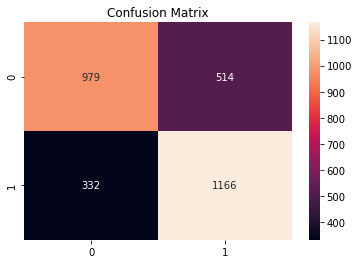

In [166]:
sns.heatmap(con_metric, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.show()

### PRECISION

In [167]:
tuned_parameters = [{'n_neighbors' : [1, 2, 3, 4, 5, 6, 7], 'p' : [1, 2, 3, 4]}]

clf = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, scoring = 'precision')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'p': 2, 'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2)

0.7214484679665738


In [168]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_p', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [169]:
print(clf.cv_results_['split0_test_score'])

[0.73170732 0.76595745 0.69879518 0.81034483 0.72941176 0.70588235
 0.71428571 0.73809524 0.72619048 0.72839506]


In [170]:
print(clf.cv_results_['split1_test_score'])

[0.66666667 0.7704918  0.66292135 0.76056338 0.71111111 0.70967742
 0.72941176 0.70652174 0.70652174 0.65591398]


In [171]:
print(clf.cv_results_['split2_test_score'])

[0.61797753 0.69491525 0.68292683 0.65333333 0.63736264 0.63157895
 0.61111111 0.62222222 0.64516129 0.61538462]


In [172]:
print(clf.cv_results_['split3_test_score'])

[0.73239437 0.86111111 0.6969697  0.76923077 0.74025974 0.71830986
 0.71830986 0.69565217 0.76       0.72307692]


In [173]:
print(clf.cv_results_['split4_test_score'])

[0.67073171 0.64150943 0.65333333 0.71875    0.67045455 0.65517241
 0.6626506  0.66216216 0.65882353 0.65822785]


### RECALL

In [174]:
tuned_parameters = [{'n_neighbors' : [1, 2, 3, 4, 5, 6, 7], 'p' : [1, 2, 3, 4]}]

clf = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, scoring = 'recall')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'p': 1, 'n_neighbors': 5}
KNeighborsClassifier(p=1)

0.7696929238985314


In [175]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_p', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [176]:
print(clf.cv_results_['split0_test_score'])

[0.74324324 0.48648649 0.7972973  0.75675676 0.83783784 0.63513514
 0.66216216 0.5        0.78378378 0.77027027]


In [177]:
print(clf.cv_results_['split1_test_score'])

[0.76       0.62666667 0.84       0.8        0.86666667 0.72
 0.72       0.54666667 0.78666667 0.77333333]


In [178]:
print(clf.cv_results_['split2_test_score'])

[0.75675676 0.55405405 0.83783784 0.72972973 0.75675676 0.66216216
 0.67567568 0.54054054 0.75675676 0.75675676]


In [179]:
print(clf.cv_results_['split3_test_score'])

[0.63513514 0.41891892 0.71621622 0.66216216 0.64864865 0.54054054
 0.54054054 0.36486486 0.62162162 0.62162162]


In [180]:
print(clf.cv_results_['split4_test_score'])

[0.66216216 0.45945946 0.75675676 0.68918919 0.66216216 0.62162162
 0.63513514 0.43243243 0.66216216 0.66216216]


### F1-SCORE

In [181]:
tuned_parameters = [{'n_neighbors' : [1, 2, 3, 4, 5, 6, 7], 'p' : [1, 2, 3, 4]}]

clf = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, scoring = 'f1')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'p': 1, 'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7, p=1)

0.7521847690387016


In [182]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_p', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [183]:
print(clf.cv_results_['split0_test_score'])

[0.78205128 0.73825503 0.74683544 0.78481013 0.5785124  0.56666667
 0.75308642 0.71532847 0.72058824 0.74666667]


In [184]:
print(clf.cv_results_['split1_test_score'])

[0.75       0.77922078 0.75903614 0.77844311 0.66666667 0.67164179
 0.77575758 0.74482759 0.72222222 0.77419355]


In [185]:
print(clf.cv_results_['split2_test_score'])

[0.69135802 0.67924528 0.71264368 0.68292683 0.65185185 0.62015504
 0.70930233 0.66225166 0.64383562 0.67080745]


In [186]:
print(clf.cv_results_['split3_test_score'])

[0.67625899 0.71942446 0.7260274  0.67132867 0.56637168 0.54205607
 0.72222222 0.63492063 0.66141732 0.70503597]


In [187]:
print(clf.cv_results_['split4_test_score'])

[0.67096774 0.69798658 0.70886076 0.66216216 0.546875   0.528
 0.7        0.66666667 0.7027027  0.68      ]


### ROC-AUC

In [188]:
tuned_parameters = [{'n_neighbors' : [1, 2, 3, 4, 5, 6, 7], 'p' : [1, 2, 3, 4]}]

clf = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, scoring = 'roc_auc')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'p': 4, 'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7, p=4)

0.7928000897825812


In [189]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_p', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [190]:
print(clf.cv_results_['split0_test_score'])

[0.80280939 0.75071124 0.76653627 0.78627312 0.79649716 0.78938478
 0.76795875 0.72030583 0.79116287 0.80325391]


In [191]:
print(clf.cv_results_['split1_test_score'])

[0.78106667 0.75066667 0.74248889 0.78453333 0.81413333 0.78844444
 0.74746667 0.67333333 0.72426667 0.81671111]


In [192]:
print(clf.cv_results_['split2_test_score'])

[0.69099099 0.73387387 0.70810811 0.72405405 0.7518018  0.73828829
 0.71081081 0.69171171 0.71585586 0.75      ]


In [193]:
print(clf.cv_results_['split3_test_score'])

[0.80675676 0.76432432 0.75783784 0.79855856 0.84558559 0.80351351
 0.7781982  0.70423423 0.79144144 0.82459459]


In [194]:
print(clf.cv_results_['split4_test_score'])

[0.7372973  0.6909009  0.68234234 0.72513514 0.73981982 0.73261261
 0.72234234 0.64441441 0.69792793 0.7172973 ]


## For the KNN Classifier, The Hyperparameter Tuning Values are as follows:

### GridSearchCV

    1. Accuracy: 0.7295218990304246
    2. Confusion Matrix: array([[ 979,  514],  [ 332, 1166]], dtype=int64)
    3. Precision: 0.7140255009107468
    4. Recall: 0.7950600801068091
    5. F1-Score: 0.7481155778894472
    6. ROC-AUC: 0.7944249398841232

### RandomizedSearchCV

    1. Accuracy: 0.7091273821464393
    2. Confusion Matrix: array([[ 979,  514],  [ 332, 1166]], dtype=int64)
    3. Precision: 0.7214484679665738
    4. Recall: 0.7696929238985314
    5. F1-Score: 0.7521847690387016
    6. ROC-AUC: 0.7928000897825812

### 3. SVM:

- A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. 
- SVMs are used in text categorization, image classification, handwriting recognition and in the sciences. 
- A support vector machine is also known as a support vector network (SVN).
- Support vector machines (SVMs) are particular linear classifiers which are based on the margin maximization principle. 
- They perform structural risk minimization, which improves the complexity of the classifier with the aim of achieving excellent generalization performance.

#### When is it used?

- It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

### TRAINING THE MODEL

In [195]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

### PREDICTING THE MODEL

In [196]:
y_pred = classifier.predict(X_test)

### EVALUATING THE MODEL USING HYPERPARAMETERS BY GRIDSEARCHCV
### ACCURACY

In [197]:
tuned_parameters = [{'kernel' : ['rbf'], 'gamma' : np.random.rand(4), 'C' : [1, 10, 100, 1000]},
                    {'kernel' : ['linear'], 'C' : [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring = 'accuracy')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'C': 100, 'kernel': 'linear'}
SVC(C=100, kernel='linear')

0.7589434971581411


In [198]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [199]:
print(clf.cv_results_['split0_test_score'])

[0.78       0.65333333 0.66666667 0.68       0.76       0.67333333
 0.68       0.68       0.76666667 0.58666667 0.6        0.62666667
 0.76666667 0.58666667 0.58666667 0.58666667 0.76666667 0.76666667
 0.77333333 0.77333333]


In [200]:
print(clf.cv_results_['split1_test_score'])

[0.74       0.63333333 0.64       0.64       0.74       0.67333333
 0.64666667 0.64666667 0.78       0.64       0.66666667 0.68
 0.72       0.60666667 0.60666667 0.61333333 0.74       0.73333333
 0.74       0.74      ]


In [201]:
print(clf.cv_results_['split2_test_score'])

[0.68456376 0.63087248 0.6442953  0.6442953  0.7114094  0.63758389
 0.63758389 0.6442953  0.69127517 0.63758389 0.6442953  0.66442953
 0.67785235 0.65771812 0.66442953 0.67785235 0.71812081 0.72483221
 0.73154362 0.73154362]


In [202]:
print(clf.cv_results_['split3_test_score'])

[0.71812081 0.68456376 0.69798658 0.69798658 0.71812081 0.70469799
 0.69127517 0.69798658 0.71812081 0.7114094  0.70469799 0.69798658
 0.7114094  0.56375839 0.58389262 0.58389262 0.7852349  0.79194631
 0.79194631 0.79194631]


In [203]:
print(clf.cv_results_['split4_test_score'])

[0.70469799 0.61073826 0.61744966 0.63087248 0.68456376 0.62416107
 0.63087248 0.63758389 0.68456376 0.63758389 0.65100671 0.65100671
 0.65771812 0.61744966 0.60402685 0.60402685 0.70469799 0.69798658
 0.70469799 0.70469799]


### CONFUSION MATRIX

In [204]:
from sklearn.metrics import confusion_matrix

In [205]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[1079,  414],
       [ 337, 1161]], dtype=int64)

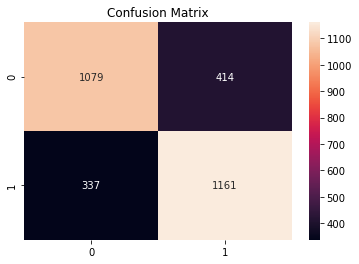

In [206]:
sns.heatmap(con_metric, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.show()

### PRECISION

In [207]:
tuned_parameters = [{'kernel' : ['rbf'], 'gamma' : np.random.rand(4), 'C' : [1, 10, 100, 1000]},
                    {'kernel' : ['linear'], 'C' : [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring = 'precision')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'C': 1, 'gamma': 0.550520541809981, 'kernel': 'rbf'}
SVC(C=1, gamma=0.550520541809981)

0.7683284457478006


In [208]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [209]:
print(clf.cv_results_['split0_test_score'])

[0.75471698 0.75925926 0.72289157 0.75       0.74074074 0.75
 0.75641026 0.75       0.65909091 0.71212121 0.77027027 0.734375
 0.55371901 0.55       0.76       0.54621849 0.76       0.76
 0.76315789 0.76315789]


In [210]:
print(clf.cv_results_['split1_test_score'])

[0.75       0.75       0.72527473 0.75       0.7037037  0.70909091
 0.7032967  0.70909091 0.71428571 0.71428571 0.7        0.71875
 0.67346939 0.69230769 0.70454545 0.69230769 0.70454545 0.70114943
 0.70454545 0.70454545]


In [211]:
print(clf.cv_results_['split2_test_score'])

[0.74468085 0.75510204 0.63541667 0.75510204 0.74468085 0.75510204
 0.66292135 0.76       0.76       0.76923077 0.6741573  0.76363636
 0.76470588 0.76363636 0.68478261 0.76363636 0.67777778 0.68131868
 0.68888889 0.68888889]


In [212]:
print(clf.cv_results_['split3_test_score'])

[0.91666667 0.91666667 0.77631579 0.91891892 0.87179487 0.875
 0.77631579 0.87804878 0.87179487 0.875      0.8028169  0.87804878
 0.55172414 0.57407407 0.80882353 0.57009346 0.78378378 0.79452055
 0.79452055 0.79452055]


In [213]:
print(clf.cv_results_['split4_test_score'])

[0.8125     0.8125     0.6626506  0.8        0.8        0.78378378
 0.68831169 0.78378378 0.76190476 0.76190476 0.69333333 0.76190476
 0.56521739 0.57017544 0.69863014 0.57017544 0.69736842 0.69333333
 0.7027027  0.7027027 ]


### RECALL

In [214]:
tuned_parameters = [{'kernel' : ['rbf'], 'gamma' : np.random.rand(4), 'C' : [1, 10, 100, 1000]},
                    {'kernel' : ['linear'], 'C' : [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring = 'recall')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'C': 1000, 'gamma': 0.9890541808267177, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.9890541808267177)

0.9392523364485982


In [215]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [216]:
print(clf.cv_results_['split0_test_score'])

[0.64864865 0.33783784 0.59459459 0.55405405 0.67567568 0.51351351
 0.58108108 0.54054054 0.68918919 0.91891892 0.64864865 0.7027027
 0.71621622 0.91891892 0.87837838 0.89189189 0.77027027 0.77027027
 0.78378378 0.78378378]


In [217]:
print(clf.cv_results_['split1_test_score'])

[0.65333333 0.38666667 0.54666667 0.48       0.66666667 0.92
 0.6        0.50666667 0.65333333 0.42666667 0.61333333 0.6
 0.65333333 0.85333333 0.56       0.44       0.82666667 0.81333333
 0.82666667 0.82666667]


In [218]:
print(clf.cv_results_['split2_test_score'])

[0.66216216 0.32432432 0.58108108 0.48648649 0.67567568 0.33783784
 0.59459459 0.5        0.67567568 0.40540541 0.59459459 0.51351351
 0.68918919 0.41891892 0.59459459 0.54054054 0.82432432 0.83783784
 0.83783784 0.83783784]


In [219]:
print(clf.cv_results_['split3_test_score'])

[0.58108108 0.36486486 0.51351351 0.44594595 0.56756757 0.86486486
 0.5        0.45945946 0.55405405 0.86486486 0.5        0.45945946
 0.55405405 0.90540541 0.56756757 0.85135135 0.78378378 0.78378378
 0.78378378 0.78378378]


In [220]:
print(clf.cv_results_['split4_test_score'])

[0.48648649 0.18918919 0.41891892 0.35135135 0.51351351 0.28378378
 0.41891892 0.37837838 0.58108108 0.89189189 0.43243243 0.43243243
 0.62162162 0.97297297 0.7972973  0.87837838 0.71621622 0.7027027
 0.7027027  0.7027027 ]


### F1-SCORE

In [221]:
tuned_parameters = [{'kernel' : ['rbf'], 'gamma' : np.random.rand(4), 'C' : [1, 10, 100, 1000]},
                    {'kernel' : ['linear'], 'C' : [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring = 'f1')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'C': 100, 'kernel': 'linear'}
SVC(C=100, kernel='linear')

0.7706013363028953


In [222]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [223]:
print(clf.cv_results_['split0_test_score'])

[0.56410256 0.70072993 0.69117647 0.61904762 0.608      0.69565217
 0.67647059 0.625      0.68717949 0.71830986 0.70921986 0.68888889
 0.68       0.73611111 0.7483871  0.68367347 0.76510067 0.76510067
 0.77333333 0.77333333]


In [224]:
print(clf.cv_results_['split1_test_score'])

[0.54545455 0.70072993 0.68656716 0.56451613 0.67357513 0.71830986
 0.68571429 0.58914729 0.55555556 0.67605634 0.68085106 0.65217391
 0.53225806 0.67132867 0.65693431 0.53225806 0.7607362  0.75308642
 0.7607362  0.7607362 ]


In [225]:
print(clf.cv_results_['split2_test_score'])

[0.52631579 0.68055556 0.65693431 0.55462185 0.52173913 0.6993007
 0.68115942 0.56666667 0.53448276 0.69503546 0.68613139 0.59016393
 0.55462185 0.70833333 0.69503546 0.624      0.74390244 0.75151515
 0.75609756 0.75609756]


In [226]:
print(clf.cv_results_['split3_test_score'])

[0.51923077 0.688      0.66666667 0.58715596 0.65497076 0.64516129
 0.6440678  0.60176991 0.67021277 0.64516129 0.6440678  0.60176991
 0.66666667 0.65079365 0.63414634 0.67368421 0.78378378 0.78911565
 0.78911565 0.78911565]


In [227]:
print(clf.cv_results_['split4_test_score'])

[0.4040404  0.5785124  0.56410256 0.47619048 0.44660194 0.6031746
 0.54237288 0.5        0.60606061 0.63636364 0.64615385 0.54385965
 0.70935961 0.65714286 0.66197183 0.69109948 0.70666667 0.69798658
 0.7027027  0.7027027 ]


### ROC-AUC

In [228]:
tuned_parameters = [{'kernel' : ['rbf'], 'gamma' : np.random.rand(4), 'C' : [1, 10, 100, 1000]},
                    {'kernel' : ['linear'], 'C' : [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, scoring = 'roc_auc')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')

0.8381597432432795


In [229]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [230]:
print(clf.cv_results_['split0_test_score'])

[0.80352063 0.79498578 0.77329303 0.73453058 0.79640825 0.78467283
 0.76120199 0.7311522  0.7727596  0.76475818 0.75337838 0.72617354
 0.74964438 0.73915363 0.72670697 0.7140825  0.84637269 0.84406117
 0.84370555 0.84370555]


In [231]:
print(clf.cv_results_['split1_test_score'])

[0.83111111 0.80568889 0.7808     0.73653333 0.82044444 0.80017778
 0.76071111 0.73404444 0.80195556 0.75413333 0.7376     0.72106667
 0.75057778 0.7392     0.72782222 0.72053333 0.84142222 0.83893333
 0.83982222 0.83964444]


In [232]:
print(clf.cv_results_['split2_test_score'])

[0.76396396 0.75945946 0.74486486 0.7409009  0.76126126 0.75693694
 0.74378378 0.72594595 0.75837838 0.76216216 0.74792793 0.72846847
 0.74540541 0.76486486 0.75567568 0.74108108 0.83099099 0.83567568
 0.83657658 0.83603604]


In [233]:
print(clf.cv_results_['split3_test_score'])

[0.8372973  0.8154955  0.77981982 0.74216216 0.81207207 0.77297297
 0.75351351 0.73243243 0.79675676 0.77801802 0.74594595 0.73279279
 0.80306306 0.78198198 0.74378378 0.72576577 0.87657658 0.87657658
 0.87675676 0.87711712]


In [234]:
print(clf.cv_results_['split4_test_score'])

[0.76918919 0.75927928 0.7172973  0.70198198 0.73027027 0.73441441
 0.71243243 0.70702703 0.73189189 0.73675676 0.72540541 0.71603604
 0.72558559 0.72810811 0.72540541 0.71153153 0.78576577 0.78
 0.77963964 0.78036036]


### EVALUATING THE MODEL USING HYPERPARAMETERS BY RANDOMIZEDSEARCHCV
### ACCURACY

In [235]:
tuned_parameters = [{'kernel' : ['rbf'], 'gamma' : np.random.rand(4), 'C' : [1, 10, 100, 1000]},
                    {'kernel' : ['linear'], 'C' : [1, 10, 100, 1000]}]

clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring = 'accuracy')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'kernel': 'linear', 'C': 100}
SVC(C=100, kernel='linear')

0.7589434971581411


In [236]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_gamma', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [237]:
print(clf.cv_results_['split0_test_score'])

[0.78       0.76666667 0.77333333 0.77333333 0.78       0.76
 0.76666667 0.76666667 0.69333333 0.70666667]


In [238]:
print(clf.cv_results_['split1_test_score'])

[0.74666667 0.74       0.74       0.74       0.76       0.74666667
 0.73333333 0.78       0.68666667 0.72      ]


In [239]:
print(clf.cv_results_['split2_test_score'])

[0.70469799 0.71812081 0.73154362 0.73154362 0.69798658 0.70469799
 0.67785235 0.69127517 0.68456376 0.67785235]


In [240]:
print(clf.cv_results_['split3_test_score'])

[0.79194631 0.7852349  0.79194631 0.79194631 0.73154362 0.71812081
 0.7114094  0.72483221 0.7114094  0.73154362]


In [241]:
print(clf.cv_results_['split4_test_score'])

[0.70469799 0.70469799 0.70469799 0.70469799 0.70469799 0.70469799
 0.69127517 0.67785235 0.65100671 0.65100671]


### CONFUSION MATRIX

In [242]:
from sklearn.metrics import confusion_matrix

In [243]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[1079,  414],
       [ 337, 1161]], dtype=int64)

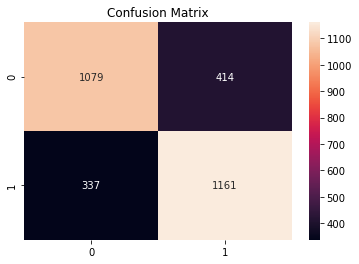

In [244]:
sns.heatmap(con_metric, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.show()

### PRECISION

In [245]:
tuned_parameters = [{'kernel' : ['rbf'], 'gamma' : np.random.rand(4), 'C' : [1, 10, 100, 1000]},
                    {'kernel' : ['linear'], 'C' : [1, 10, 100, 1000]}]

clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring = 'precision')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'kernel': 'rbf', 'gamma': 0.5508612221133035, 'C': 1}
SVC(C=1, gamma=0.5508612221133035)

0.7683284457478006


In [246]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_gamma', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [247]:
print(clf.cv_results_['split0_test_score'])

[0.75       0.57407407 0.77027027 0.76056338 0.76712329 0.76
 0.75       0.75925926 0.734375   0.76315789]


In [248]:
print(clf.cv_results_['split1_test_score'])

[0.75       0.73333333 0.75714286 0.74647887 0.72222222 0.70114943
 0.70909091 0.75       0.71875    0.70454545]


In [249]:
print(clf.cv_results_['split2_test_score'])

[0.76       0.75806452 0.69736842 0.7        0.70666667 0.68131868
 0.75510204 0.75510204 0.76363636 0.68888889]


In [250]:
print(clf.cv_results_['split3_test_score'])

[0.91891892 0.81632653 0.81355932 0.76666667 0.76271186 0.79452055
 0.875      0.91666667 0.87804878 0.79452055]


In [251]:
print(clf.cv_results_['split4_test_score'])

[0.8        0.6        0.70769231 0.6984127  0.68656716 0.69333333
 0.78378378 0.8125     0.74418605 0.7027027 ]


### RECALL

In [252]:
tuned_parameters = [{'kernel' : ['rbf'], 'gamma' : np.random.rand(4), 'C' : [1, 10, 100, 1000]},
                    {'kernel' : ['linear'], 'C' : [1, 10, 100, 1000]}]

clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring = 'recall')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'kernel': 'rbf', 'gamma': 0.8467145678607909, 'C': 1000}
SVC(C=1000, gamma=0.8467145678607909)

0.917890520694259


In [253]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_gamma', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [254]:
print(clf.cv_results_['split0_test_score'])

[0.68918919 0.66216216 0.83783784 0.51351351 0.7027027  0.78378378
 0.91891892 0.60810811 0.60810811 0.78378378]


In [255]:
print(clf.cv_results_['split1_test_score'])

[0.66666667 0.61333333 0.6        0.86666667 0.65333333 0.74666667
 0.44       0.61333333 0.64       0.76      ]


In [256]:
print(clf.cv_results_['split2_test_score'])

[0.67567568 0.59459459 0.63513514 0.41891892 0.68918919 0.7027027
 0.47297297 0.60810811 0.59459459 0.72972973]


In [257]:
print(clf.cv_results_['split3_test_score'])

[0.60810811 0.51351351 0.52702703 0.54054054 0.58108108 0.63513514
 0.90540541 0.52702703 0.51351351 0.62162162]


In [258]:
print(clf.cv_results_['split4_test_score'])

[0.56756757 0.48648649 0.66216216 0.32432432 0.62162162 0.63513514
 0.97297297 0.43243243 0.41891892 0.66216216]


### F1-SCORE

In [259]:
tuned_parameters = [{'kernel' : ['rbf'], 'gamma' : np.random.rand(4), 'C' : [1, 10, 100, 1000]},
                    {'kernel' : ['linear'], 'C' : [1, 10, 100, 1000]}]

clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring = 'f1')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'kernel': 'linear', 'C': 1000}
SVC(C=1000, kernel='linear')

0.7712376710149539


In [260]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_gamma', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [261]:
print(clf.cv_results_['split0_test_score'])

[0.69565217 0.67357513 0.7        0.61904762 0.77333333 0.71830986
 0.76510067 0.76510067 0.67669173 0.62992126]


In [262]:
print(clf.cv_results_['split1_test_score'])

[0.71830986 0.56692913 0.67142857 0.56451613 0.7607362  0.67605634
 0.75308642 0.7607362  0.68656716 0.58914729]


In [263]:
print(clf.cv_results_['split2_test_score'])

[0.6993007  0.65116279 0.66165414 0.55462185 0.75609756 0.69503546
 0.75151515 0.74390244 0.67164179 0.54237288]


In [264]:
print(clf.cv_results_['split3_test_score'])

[0.64516129 0.68131868 0.6440678  0.58715596 0.78911565 0.64516129
 0.78911565 0.78378378 0.65546218 0.58928571]


In [265]:
print(clf.cv_results_['split4_test_score'])

[0.6031746  0.69148936 0.58536585 0.47619048 0.7027027  0.63636364
 0.69798658 0.70666667 0.55172414 0.5       ]


### ROC-AUC

In [266]:
tuned_parameters = [{'kernel' : ['rbf'], 'gamma' : np.random.rand(4), 'C' : [1, 10, 100, 1000]},
                    {'kernel' : ['linear'], 'C' : [1, 10, 100, 1000]}]

clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring = 'roc_auc')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'kernel': 'linear', 'C': 10}
SVC(C=10, kernel='linear')

0.836978440555257


In [267]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_gamma', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [268]:
print(clf.cv_results_['split0_test_score'])

[0.73204125 0.81418919 0.72706259 0.79587482 0.78076102 0.74128734
 0.76191323 0.83623755 0.84406117 0.71443812]


In [269]:
print(clf.cv_results_['split1_test_score'])

[0.73528889 0.81315556 0.72177778 0.82311111 0.79253333 0.74897778
 0.7472     0.85368889 0.83893333 0.7216    ]


In [270]:
print(clf.cv_results_['split2_test_score'])

[0.72540541 0.76396396 0.73369369 0.74468468 0.75495495 0.74432432
 0.76198198 0.79297297 0.83567568 0.74288288]


In [271]:
print(clf.cv_results_['split3_test_score'])

[0.73297297 0.81027027 0.73315315 0.79135135 0.76720721 0.75027027
 0.76414414 0.8627027  0.87657658 0.72504505]


In [272]:
print(clf.cv_results_['split4_test_score'])

[0.71297297 0.69891892 0.72216216 0.69279279 0.73063063 0.70612613
 0.7363964  0.77063063 0.78       0.71297297]


## For the SVM Classifier, The Hyperparameter Tuning Values are as follows:

### GridSearchCV

    1. Accuracy: 0.7589434971581411
    2. Confusion Matrix: array([[1079,  414],  [ 337, 1161]], dtype=int64)
    3. Precision: 0.7683284457478006
    4. Recall: 0.9392523364485982
    5. F1-Score: 0.7706013363028953
    6. ROC-AUC: 0.8381597432432795

### RandomizedSearchCV

    1. Accuracy: 0.7589434971581411
    2. Confusion Matrix: array([[1079,  414],  [ 337, 1161]], dtype=int64)
    3. Precision: 0.7683284457478006
    4. Recall: 0.917890520694259
    5. F1-Score: 0.7712376710149539
    6. ROC-AUC: 0.836978440555257

### 4. DECISION TREE:

- Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. 
- The tree can be explained by two entities, namely decision nodes and leaves.
- It's a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails), each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class.

### TRAINING THE MODEL

In [273]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### PREDICTING THE MODEL

In [274]:
y_pred = classifier.predict(X_test)

### EVALUATING THE MODEL USING HYPERPARAMETERS BY GRIDSEARCHCV
### ACCURACY

In [275]:
tuned_parameters = [{'max_depth' : [2, 3, 5, 7, 9, 10]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'accuracy')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)

0.7305249080575058


In [276]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [277]:
print(clf.cv_results_['split0_test_score'])

[0.72       0.74       0.74       0.70666667 0.68       0.7       ]


In [278]:
print(clf.cv_results_['split1_test_score'])

[0.67333333 0.64666667 0.68666667 0.66       0.66       0.65333333]


In [279]:
print(clf.cv_results_['split2_test_score'])

[0.69798658 0.66442953 0.7114094  0.67785235 0.69127517 0.69798658]


In [280]:
print(clf.cv_results_['split3_test_score'])

[0.71812081 0.69798658 0.69127517 0.75167785 0.6442953  0.65100671]


In [281]:
print(clf.cv_results_['split4_test_score'])

[0.67114094 0.66442953 0.67785235 0.65100671 0.67785235 0.65771812]


### CONFUSION MATRIX

In [282]:
from sklearn.metrics import confusion_matrix

In [283]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[1077,  416],
       [ 493, 1005]], dtype=int64)

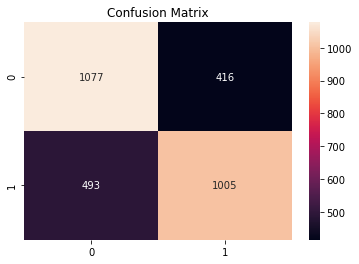

In [284]:
sns.heatmap(con_metric, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.show()

### PRECISION

In [285]:
tuned_parameters = [{'max_depth' : [2, 3, 5, 7, 9, 10]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'precision')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 2}
DecisionTreeClassifier(max_depth=2)

0.7072484166080225


In [286]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [287]:
print(clf.cv_results_['split0_test_score'])

[0.72857143 0.72151899 0.70588235 0.70666667 0.69863014 0.73529412]


In [288]:
print(clf.cv_results_['split1_test_score'])

[0.625      0.59482759 0.67073171 0.62765957 0.6375     0.63013699]


In [289]:
print(clf.cv_results_['split2_test_score'])

[0.67901235 0.60169492 0.6741573  0.65555556 0.63333333 0.65060241]


In [290]:
print(clf.cv_results_['split3_test_score'])

[0.75806452 0.72307692 0.73333333 0.75       0.64935065 0.64473684]


In [291]:
print(clf.cv_results_['split4_test_score'])

[0.79069767 0.72222222 0.66666667 0.66666667 0.66197183 0.67123288]


### RECALL

In [292]:
tuned_parameters = [{'max_depth' : [2, 3, 5, 7, 9, 10]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'recall')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 3}
DecisionTreeClassifier(max_depth=3)

0.670894526034713


In [293]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [294]:
print(clf.cv_results_['split0_test_score'])

[0.68918919 0.77027027 0.81081081 0.72972973 0.68918919 0.67567568]


In [295]:
print(clf.cv_results_['split1_test_score'])

[0.86666667 0.92       0.73333333 0.8        0.66666667 0.61333333]


In [296]:
print(clf.cv_results_['split2_test_score'])

[0.74324324 0.95945946 0.81081081 0.7972973  0.7972973  0.78378378]


In [297]:
print(clf.cv_results_['split3_test_score'])

[0.63513514 0.63513514 0.59459459 0.71621622 0.64864865 0.64864865]


In [298]:
print(clf.cv_results_['split4_test_score'])

[0.45945946 0.52702703 0.63513514 0.62162162 0.64864865 0.66216216]


### F1-SCORE

In [299]:
tuned_parameters = [{'max_depth' : [2, 3, 5, 7, 9, 10]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'f1')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)

0.74368


In [300]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [301]:
print(clf.cv_results_['split0_test_score'])

[0.70833333 0.74509804 0.7625     0.71052632 0.69387755 0.69863014]


In [302]:
print(clf.cv_results_['split1_test_score'])

[0.72625698 0.72251309 0.70063694 0.69047619 0.65359477 0.63945578]


In [303]:
print(clf.cv_results_['split2_test_score'])

[0.70967742 0.73958333 0.73619632 0.70807453 0.6918239  0.69677419]


In [304]:
print(clf.cv_results_['split3_test_score'])

[0.69117647 0.67625899 0.65671642 0.74482759 0.65333333 0.66216216]


In [305]:
print(clf.cv_results_['split4_test_score'])

[0.58119658 0.609375   0.65734266 0.61428571 0.65771812 0.66216216]


### ROC-AUC

In [306]:
tuned_parameters = [{'max_depth' : [2, 3, 5, 7, 9, 10]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'roc_auc')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 3}
DecisionTreeClassifier(max_depth=3)

0.7853525620675748


In [307]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [308]:
print(clf.cv_results_['split0_test_score'])

[0.7765825  0.83214794 0.82939189 0.75933499 0.68545519 0.67780939]


In [309]:
print(clf.cv_results_['split1_test_score'])

[0.684      0.74453333 0.73617778 0.65848889 0.63475556 0.63368889]


In [310]:
print(clf.cv_results_['split2_test_score'])

[0.71333333 0.78783784 0.76558559 0.71567568 0.66990991 0.66099099]


In [311]:
print(clf.cv_results_['split3_test_score'])

[0.77972973 0.79054054 0.78603604 0.73792793 0.71324324 0.69063063]


In [312]:
print(clf.cv_results_['split4_test_score'])

[0.69387387 0.73432432 0.72891892 0.67864865 0.65702703 0.66333333]


### EVALUATING THE MODEL USING HYPERPARAMETERS BY RANDOMIZEDSEARCHCV
### ACCURACY

In [313]:
tuned_parameters = [{'max_depth' : [2, 3, 5, 7, 9, 10]}]

clf = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'accuracy')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)

0.7305249080575058


### CONFUSION MATRIX

In [314]:
from sklearn.metrics import confusion_matrix

In [315]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[1077,  416],
       [ 493, 1005]], dtype=int64)

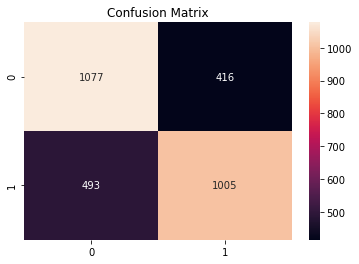

In [316]:
sns.heatmap(con_metric, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.show()

### PRECISION

In [317]:
tuned_parameters = [{'max_depth' : [2, 3, 5, 7, 9, 10]}]

clf = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'precision')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 2}
DecisionTreeClassifier(max_depth=2)

0.7072484166080225


In [318]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [319]:
print(clf.cv_results_['split0_test_score'])

[0.72857143 0.72151899 0.69767442 0.71052632 0.71232877 0.7       ]


In [320]:
print(clf.cv_results_['split1_test_score'])

[0.625      0.59482759 0.67073171 0.6185567  0.65384615 0.65277778]


In [321]:
print(clf.cv_results_['split2_test_score'])

[0.67901235 0.60169492 0.65934066 0.64044944 0.6547619  0.63636364]


In [322]:
print(clf.cv_results_['split3_test_score'])

[0.75806452 0.72307692 0.73333333 0.73972603 0.65753425 0.62337662]


In [323]:
print(clf.cv_results_['split4_test_score'])

[0.79069767 0.72222222 0.68115942 0.66176471 0.67605634 0.68055556]


### RECALL

In [324]:
tuned_parameters = [{'max_depth' : [2, 3, 5, 7, 9, 10]}]

clf = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'recall')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 3}
DecisionTreeClassifier(max_depth=3)

0.670894526034713


In [325]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [326]:
print(clf.cv_results_['split0_test_score'])

[0.68918919 0.77027027 0.81081081 0.7027027  0.7027027  0.67567568]


In [327]:
print(clf.cv_results_['split1_test_score'])

[0.86666667 0.92       0.73333333 0.78666667 0.68       0.62666667]


In [328]:
print(clf.cv_results_['split2_test_score'])

[0.74324324 0.95945946 0.81081081 0.7972973  0.68918919 0.72972973]


In [329]:
print(clf.cv_results_['split3_test_score'])

[0.63513514 0.63513514 0.59459459 0.71621622 0.60810811 0.68918919]


In [330]:
print(clf.cv_results_['split4_test_score'])

[0.45945946 0.52702703 0.63513514 0.60810811 0.63513514 0.62162162]


### F1-SCORE

In [331]:
tuned_parameters = [{'max_depth' : [2, 3, 5, 7, 9, 10]}]

clf = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'f1')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)

0.7423273657289003


In [332]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [333]:
print(clf.cv_results_['split0_test_score'])

[0.70833333 0.74509804 0.75776398 0.70748299 0.68965517 0.68493151]


In [334]:
print(clf.cv_results_['split1_test_score'])

[0.72625698 0.72251309 0.69620253 0.70588235 0.64935065 0.64      ]


In [335]:
print(clf.cv_results_['split2_test_score'])

[0.70967742 0.73958333 0.73619632 0.7195122  0.70731707 0.7       ]


In [336]:
print(clf.cv_results_['split3_test_score'])

[0.69117647 0.67625899 0.65671642 0.73103448 0.66666667 0.64383562]


In [337]:
print(clf.cv_results_['split4_test_score'])

[0.58119658 0.609375   0.65753425 0.63380282 0.64827586 0.63829787]


### ROC-AUC

In [338]:
tuned_parameters = [{'max_depth' : [2, 3, 5, 7, 9, 10]}]

clf = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring = 'roc_auc')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 3}
DecisionTreeClassifier(max_depth=3)

0.7853525620675748


In [339]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [340]:
print(clf.cv_results_['split0_test_score'])

[0.7765825  0.83214794 0.81899004 0.76653627 0.69674609 0.69185633]


In [341]:
print(clf.cv_results_['split1_test_score'])

[0.684      0.74453333 0.72346667 0.64951111 0.64568889 0.64017778]


In [342]:
print(clf.cv_results_['split2_test_score'])

[0.71333333 0.78783784 0.76558559 0.70936937 0.71783784 0.65423423]


In [343]:
print(clf.cv_results_['split3_test_score'])

[0.77972973 0.79054054 0.78603604 0.7681982  0.7072973  0.70171171]


In [344]:
print(clf.cv_results_['split4_test_score'])

[0.69387387 0.73432432 0.72963964 0.67171171 0.66414414 0.65702703]


## For the Decision Tree Classifier, The Hyperparameter Tuning Values are as follows:

### GridSearchCV

    1. Accuracy: 0.7305249080575058
    2. Confusion Matrix: array([[1077,  416],  [ 493, 1005]], dtype=int64)
    3. Precision: 0.7072484166080225
    4. Recall: 0.670894526034713
    5. F1-Score: 0.74368
    6. ROC-AUC: 0.7853525620675748

### RandomizedSearchCV

    1. Accuracy: 0.7305249080575058
    2. Confusion Matrix: array([[1077,  416],  [ 493, 1005]], dtype=int64)
    3. Precision: 0.7072484166080225
    4. Recall: 0.670894526034713
    5. F1-Score: 0.7423273657289003
    6. ROC-AUC: 0.7853525620675748

### 5. RANDOM FOREST: 

- Random forest is a supervised learning algorithm which is used for both classification as well as regression.
- Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.
- Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting.

#### What is Random in Random Forest algorithm?

- The random forest is a classification algorithm consisting of many decisions trees. 
- It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

#### What is Random Classifier?

- Random forest classifier creates a set of decision trees from randomly selected subset of training set. 
- It then aggregates the votes from different decision trees to decide the final class of the test object.

#### Is Random Forest a boosting algorithm?

- A random forest is not considered a boosting type of algorithm.
- A random forest, in contrast, is an ensemble bagging or averaging method that aims to reduce the variance of individual trees by randomly selecting (and thus de-correlating) many trees from the dataset, and averaging them.

#### What is Bagging Technique in Machine Learning?

- Bootstrap aggregating, also called bagging (from bootstrap aggregating), is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. 
- It also reduces variance and helps to avoid overfitting.

### TRAINING THE MODEL

In [345]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 3)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

### PREDICTING THE MODEL

In [346]:
y_test_pred = classifier.predict(X_test)

### EVALUATING THE MODEL USING HYPERPARAMETERS BY GRIDSEARCHCV
### ACCURACY

In [347]:
tuned_parameters = [{'min_samples_split': [2, 5, 7, 9, 10], 'max_depth' : [3, 5, 7, 10]}]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'accuracy')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 10, 'min_samples_split': 7}
RandomForestClassifier(max_depth=10, min_samples_split=7)

0.7535941156803745


In [348]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [349]:
print(clf.cv_results_['split0_test_score'])

[0.74666667 0.74       0.74666667 0.74666667 0.75333333 0.75333333
 0.76       0.75333333 0.76       0.79333333 0.76       0.77333333
 0.78666667 0.76       0.79333333 0.76666667 0.77333333 0.78666667
 0.78666667 0.80666667]


In [350]:
print(clf.cv_results_['split1_test_score'])

[0.76       0.76666667 0.74666667 0.76666667 0.74666667 0.72666667
 0.74666667 0.74       0.74       0.73333333 0.74666667 0.76
 0.77333333 0.73333333 0.75333333 0.73333333 0.76666667 0.76
 0.76       0.76      ]


In [351]:
print(clf.cv_results_['split2_test_score'])

[0.69127517 0.69798658 0.69127517 0.70469799 0.69798658 0.72483221
 0.69798658 0.69127517 0.66442953 0.70469799 0.72483221 0.71812081
 0.7114094  0.7114094  0.69798658 0.71812081 0.69798658 0.72483221
 0.7114094  0.70469799]


In [352]:
print(clf.cv_results_['split3_test_score'])

[0.75838926 0.79194631 0.79865772 0.81208054 0.76510067 0.7852349
 0.76510067 0.79194631 0.80536913 0.79194631 0.81879195 0.81208054
 0.79865772 0.7852349  0.79865772 0.77852349 0.81208054 0.79865772
 0.79194631 0.79865772]


In [353]:
print(clf.cv_results_['split4_test_score'])

[0.69127517 0.71812081 0.71812081 0.67785235 0.69127517 0.73154362
 0.69798658 0.67785235 0.7114094  0.69798658 0.71812081 0.70469799
 0.69798658 0.7114094  0.69127517 0.71812081 0.70469799 0.71812081
 0.7114094  0.71812081]


### CONFUSION MATRIX

In [354]:
from sklearn.metrics import confusion_matrix

In [355]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[1077,  416],
       [ 493, 1005]], dtype=int64)

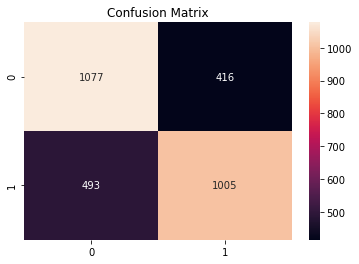

In [356]:
sns.heatmap(con_metric, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.show()

### PRECISION

In [357]:
tuned_parameters = [{'min_samples_split': [2, 5, 7, 9, 10], 'max_depth' : [3, 5, 7, 10]}]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'precision')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 7, 'min_samples_split': 10}
RandomForestClassifier(max_depth=7, min_samples_split=10)

0.7512658227848101


In [358]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [359]:
print(clf.cv_results_['split0_test_score'])

[0.74025974 0.74025974 0.73170732 0.72839506 0.75342466 0.75324675
 0.74358974 0.73417722 0.75324675 0.74358974 0.74358974 0.76315789
 0.77333333 0.75675676 0.76       0.76623377 0.7826087  0.78571429
 0.8        0.74666667]


In [360]:
print(clf.cv_results_['split1_test_score'])

[0.72727273 0.71428571 0.71428571 0.75       0.71590909 0.70454545
 0.71590909 0.72619048 0.70454545 0.72093023 0.7125     0.73493976
 0.73255814 0.73493976 0.73255814 0.74074074 0.7375     0.72727273
 0.72368421 0.70731707]


In [361]:
print(clf.cv_results_['split2_test_score'])

[0.64210526 0.64893617 0.63829787 0.64893617 0.65217391 0.65217391
 0.65263158 0.65591398 0.65217391 0.65217391 0.67021277 0.67021277
 0.65591398 0.67816092 0.70930233 0.69047619 0.68604651 0.67058824
 0.66292135 0.68235294]


In [362]:
print(clf.cv_results_['split3_test_score'])

[0.84057971 0.80597015 0.8030303  0.82608696 0.82352941 0.82608696
 0.82352941 0.84126984 0.81818182 0.83076923 0.84126984 0.84375
 0.80952381 0.82608696 0.859375   0.8        0.84375    0.83606557
 0.82089552 0.87096774]


In [363]:
print(clf.cv_results_['split4_test_score'])

[0.68571429 0.68421053 0.68493151 0.70833333 0.68918919 0.72463768
 0.67567568 0.69444444 0.67105263 0.73529412 0.72058824 0.72463768
 0.72857143 0.72857143 0.72857143 0.71830986 0.71428571 0.75
 0.72058824 0.72222222]


### RECALL

In [364]:
tuned_parameters = [{'min_samples_split': [2, 5, 7, 9, 10], 'max_depth' : [3, 5, 7, 10]}]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'recall')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 3, 'min_samples_split': 5}
RandomForestClassifier(max_depth=3, min_samples_split=5)

0.7910547396528705


In [365]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [366]:
print(clf.cv_results_['split0_test_score'])

[0.7972973  0.7972973  0.7972973  0.7972973  0.77027027 0.81081081
 0.78378378 0.75675676 0.77027027 0.78378378 0.77027027 0.78378378
 0.75675676 0.77027027 0.75675676 0.74324324 0.75675676 0.75675676
 0.77027027 0.74324324]


In [367]:
print(clf.cv_results_['split1_test_score'])

[0.85333333 0.85333333 0.86666667 0.86666667 0.85333333 0.82666667
 0.84       0.82666667 0.81333333 0.8        0.85333333 0.8
 0.84       0.78666667 0.8        0.77333333 0.8        0.78666667
 0.82666667 0.78666667]


In [368]:
print(clf.cv_results_['split2_test_score'])

[0.81081081 0.82432432 0.81081081 0.85135135 0.82432432 0.81081081
 0.82432432 0.81081081 0.82432432 0.81081081 0.83783784 0.81081081
 0.81081081 0.81081081 0.7972973  0.82432432 0.7972973  0.83783784
 0.78378378 0.78378378]


In [369]:
print(clf.cv_results_['split3_test_score'])

[0.68918919 0.72972973 0.75675676 0.75675676 0.75675676 0.7027027
 0.71621622 0.72972973 0.75675676 0.7027027  0.77027027 0.75675676
 0.74324324 0.67567568 0.68918919 0.74324324 0.72972973 0.72972973
 0.74324324 0.72972973]


In [370]:
print(clf.cv_results_['split4_test_score'])

[0.71621622 0.75675676 0.67567568 0.68918919 0.67567568 0.67567568
 0.7027027  0.66216216 0.68918919 0.67567568 0.68918919 0.7027027
 0.68918919 0.67567568 0.64864865 0.67567568 0.68918919 0.67567568
 0.67567568 0.66216216]


### F1-SCORE

In [371]:
tuned_parameters = [{'min_samples_split': [2, 5, 7, 9, 10], 'max_depth' : [3, 5, 7, 10]}]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'f1')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 3, 'min_samples_split': 10}
RandomForestClassifier(max_depth=3, min_samples_split=10)

0.7695299837925444


In [372]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [373]:
print(clf.cv_results_['split0_test_score'])

[0.73684211 0.74025974 0.74509804 0.7388535  0.76129032 0.75496689
 0.77631579 0.77027027 0.78481013 0.75675676 0.74829932 0.75167785
 0.75862069 0.76510067 0.78431373 0.74324324 0.76190476 0.75862069
 0.78082192 0.78378378]


In [374]:
print(clf.cv_results_['split1_test_score'])

[0.7804878  0.78313253 0.79518072 0.79518072 0.78787879 0.7607362
 0.75609756 0.76363636 0.7625     0.74846626 0.7875     0.76923077
 0.7483871  0.77300613 0.75       0.74213836 0.75776398 0.76433121
 0.73548387 0.7388535 ]


In [375]:
print(clf.cv_results_['split2_test_score'])

[0.72727273 0.7195122  0.73493976 0.73053892 0.73170732 0.75151515
 0.72189349 0.72289157 0.7195122  0.72289157 0.76923077 0.74698795
 0.74213836 0.74074074 0.72839506 0.77300613 0.75308642 0.75
 0.72955975 0.69620253]


In [376]:
print(clf.cv_results_['split3_test_score'])

[0.79452055 0.76923077 0.78082192 0.76388889 0.79166667 0.77697842
 0.75912409 0.77697842 0.76258993 0.75362319 0.77697842 0.77697842
 0.78571429 0.77037037 0.78571429 0.76595745 0.77697842 0.79136691
 0.78832117 0.80555556]


In [377]:
print(clf.cv_results_['split4_test_score'])

[0.68965517 0.68965517 0.67567568 0.68027211 0.71523179 0.67123288
 0.70833333 0.71830986 0.70833333 0.70344828 0.70344828 0.68965517
 0.70921986 0.68493151 0.70833333 0.71724138 0.71328671 0.70344828
 0.70344828 0.69387755]


### ROC-AUC

In [378]:
tuned_parameters = [{'min_samples_split': [2, 5, 7, 9, 10], 'max_depth' : [3, 5, 7, 10]}]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'roc_auc')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'max_depth': 7, 'min_samples_split': 2}
RandomForestClassifier(max_depth=7)

0.8385467294190871


In [379]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [380]:
print(clf.cv_results_['split0_test_score'])

[0.85152916 0.84619488 0.8655761  0.85917496 0.85544097 0.85633001
 0.85633001 0.85526316 0.85561878 0.85152916 0.85704125 0.84832859
 0.84708393 0.85864154 0.86184211 0.84601707 0.84672831 0.85633001
 0.85881935 0.85241821]


In [381]:
print(clf.cv_results_['split1_test_score'])

[0.84728889 0.8544     0.84586667 0.85671111 0.85831111 0.84533333
 0.85493333 0.86382222 0.8576     0.85226667 0.86097778 0.84568889
 0.8512     0.85315556 0.85795556 0.84035556 0.84035556 0.85617778
 0.85404444 0.85955556]


In [382]:
print(clf.cv_results_['split2_test_score'])

[0.80990991 0.80936937 0.81369369 0.81297297 0.80945946 0.81117117
 0.81189189 0.80792793 0.81711712 0.8136036  0.81513514 0.82036036
 0.81099099 0.81603604 0.81117117 0.8209009  0.82936937 0.8172973
 0.81657658 0.80666667]


In [383]:
print(clf.cv_results_['split3_test_score'])

[0.88234234 0.87585586 0.87441441 0.87279279 0.87081081 0.8772973
 0.88252252 0.88414414 0.88414414 0.88432432 0.88882883 0.88342342
 0.88882883 0.88810811 0.89135135 0.87423423 0.8827027  0.87657658
 0.87711712 0.87783784]


In [384]:
print(clf.cv_results_['split4_test_score'])

[0.78486486 0.78198198 0.78414414 0.78486486 0.78018018 0.77783784
 0.77351351 0.76990991 0.77243243 0.77243243 0.77873874 0.76756757
 0.7781982  0.77387387 0.77261261 0.76504505 0.77135135 0.7609009
 0.77657658 0.76882883]


### EVALUATING THE MODEL USING HYPERPARAMETERS BY RANDOMIZEDSEARCHCV
### ACCURACY

In [385]:
tuned_parameters = [{'min_samples_split': [2, 5, 7, 9, 10], 'max_depth' : [3, 5, 7, 10]}]

clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'accuracy')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'min_samples_split': 9, 'max_depth': 10}
RandomForestClassifier(max_depth=10, min_samples_split=9)

0.7569374791039786


In [386]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_min_samples_split', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [387]:
print(clf.cv_results_['split0_test_score'])

[0.75333333 0.77333333 0.78       0.74666667 0.74       0.76
 0.78666667 0.75333333 0.76666667 0.73333333]


In [388]:
print(clf.cv_results_['split1_test_score'])

[0.75333333 0.73333333 0.76       0.74666667 0.74666667 0.78
 0.74666667 0.75333333 0.75333333 0.74666667]


In [389]:
print(clf.cv_results_['split2_test_score'])

[0.69798658 0.7114094  0.71812081 0.69798658 0.73154362 0.69127517
 0.72483221 0.69798658 0.7114094  0.69798658]


In [390]:
print(clf.cv_results_['split3_test_score'])

[0.79194631 0.79194631 0.77852349 0.75167785 0.79865772 0.77852349
 0.77181208 0.79865772 0.7852349  0.77852349]


In [391]:
print(clf.cv_results_['split4_test_score'])

[0.70469799 0.72483221 0.67785235 0.70469799 0.71812081 0.71812081
 0.7114094  0.69798658 0.70469799 0.70469799]


### CONFUSION MATRIX

In [392]:
from sklearn.metrics import confusion_matrix

In [393]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[1077,  416],
       [ 493, 1005]], dtype=int64)

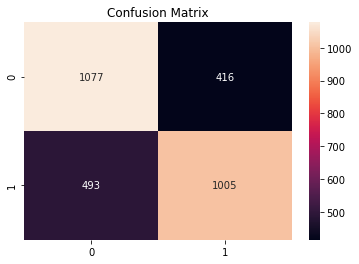

In [394]:
sns.heatmap(con_metric, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.show()

### PRECISION

In [395]:
tuned_parameters = [{'min_samples_split': [2, 5, 7, 9, 10], 'max_depth' : [3, 5, 7, 10]}]

clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'precision')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'min_samples_split': 9, 'max_depth': 7}
RandomForestClassifier(max_depth=7, min_samples_split=9)

0.7545219638242894


In [396]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_min_samples_split', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [397]:
print(clf.cv_results_['split0_test_score'])

[0.74683544 0.76388889 0.75       0.78082192 0.78378378 0.73076923
 0.71604938 0.75675676 0.74074074 0.77142857]


In [398]:
print(clf.cv_results_['split1_test_score'])

[0.71590909 0.74074074 0.72619048 0.73493976 0.73809524 0.72093023
 0.72413793 0.72619048 0.71264368 0.74683544]


In [399]:
print(clf.cv_results_['split2_test_score'])

[0.65555556 0.66666667 0.68888889 0.72093023 0.69230769 0.625
 0.63157895 0.65591398 0.65957447 0.69662921]


In [400]:
print(clf.cv_results_['split3_test_score'])

[0.86666667 0.84615385 0.83870968 0.84375    0.83076923 0.82352941
 0.81967213 0.84126984 0.83333333 0.859375  ]


In [401]:
print(clf.cv_results_['split4_test_score'])

[0.71428571 0.71428571 0.71830986 0.74285714 0.71428571 0.72
 0.74242424 0.70833333 0.68493151 0.71428571]


### RECALL

In [402]:
tuned_parameters = [{'min_samples_split': [2, 5, 7, 9, 10], 'max_depth' : [3, 5, 7, 10]}]

clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'recall')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'min_samples_split': 5, 'max_depth': 7}
RandomForestClassifier(max_depth=7, min_samples_split=5)

0.7783711615487316


In [403]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_min_samples_split', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [404]:
print(clf.cv_results_['split0_test_score'])

[0.75675676 0.81081081 0.81081081 0.77027027 0.77027027 0.78378378
 0.75675676 0.78378378 0.78378378 0.77027027]


In [405]:
print(clf.cv_results_['split1_test_score'])

[0.85333333 0.82666667 0.81333333 0.82666667 0.84       0.86666667
 0.77333333 0.82666667 0.85333333 0.84      ]


In [406]:
print(clf.cv_results_['split2_test_score'])

[0.82432432 0.83783784 0.75675676 0.81081081 0.81081081 0.83783784
 0.78378378 0.78378378 0.83783784 0.81081081]


In [407]:
print(clf.cv_results_['split3_test_score'])

[0.74324324 0.75675676 0.71621622 0.64864865 0.72972973 0.72972973
 0.75675676 0.75675676 0.74324324 0.72972973]


In [408]:
print(clf.cv_results_['split4_test_score'])

[0.68918919 0.67567568 0.7027027  0.66216216 0.66216216 0.67567568
 0.68918919 0.68918919 0.68918919 0.68918919]


### F1-SCORE

In [409]:
tuned_parameters = [{'min_samples_split': [2, 5, 7, 9, 10], 'max_depth' : [3, 5, 7, 10]}]

clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'f1')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'min_samples_split': 2, 'max_depth': 7}
RandomForestClassifier(max_depth=7)

0.7677293428757318


In [410]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_min_samples_split', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [411]:
print(clf.cv_results_['split0_test_score'])

[0.75862069 0.74509804 0.77333333 0.75       0.76433121 0.76190476
 0.75       0.76623377 0.77631579 0.75167785]


In [412]:
print(clf.cv_results_['split1_test_score'])

[0.7826087  0.79041916 0.7625     0.7721519  0.76829268 0.7875
 0.79289941 0.77300613 0.77108434 0.74683544]


In [413]:
print(clf.cv_results_['split2_test_score'])

[0.7195122  0.71428571 0.73053892 0.7625     0.71856287 0.75609756
 0.7283237  0.72619048 0.71604938 0.72727273]


In [414]:
print(clf.cv_results_['split3_test_score'])

[0.76258993 0.77464789 0.75555556 0.79432624 0.76923077 0.79432624
 0.77941176 0.80555556 0.77142857 0.7826087 ]


In [415]:
print(clf.cv_results_['split4_test_score'])

[0.68531469 0.69736842 0.68055556 0.69863014 0.69503546 0.70422535
 0.68493151 0.66666667 0.70344828 0.69387755]


### ROC-AUC

In [416]:
tuned_parameters = [{'min_samples_split': [2, 5, 7, 9, 10], 'max_depth' : [3, 5, 7, 10]}]

clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, scoring = 'roc_auc')

clf.fit(X_train, y_train)

print("Best parameters set found on train set : ")

print(clf.best_params_)

print(clf.best_estimator_)

print()

print(clf.score(X_test, y_test))

Best parameters set found on train set : 
{'min_samples_split': 7, 'max_depth': 5}
RandomForestClassifier(max_depth=5, min_samples_split=7)

0.842675699772056


In [417]:
print(clf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_min_samples_split', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [418]:
print(clf.cv_results_['split0_test_score'])

[0.83890469 0.86148649 0.85455192 0.85899716 0.85633001 0.8579303
 0.85117354 0.86273115 0.85401849 0.84619488]


In [419]:
print(clf.cv_results_['split1_test_score'])

[0.83964444 0.85137778 0.8512     0.85333333 0.85102222 0.84995556
 0.84551111 0.85208889 0.84906667 0.85742222]


In [420]:
print(clf.cv_results_['split2_test_score'])

[0.81675676 0.81459459 0.8227027  0.82288288 0.81783784 0.81171171
 0.82018018 0.80900901 0.82162162 0.81315315]


In [421]:
print(clf.cv_results_['split3_test_score'])

[0.87351351 0.88378378 0.88648649 0.88594595 0.87567568 0.87693694
 0.86810811 0.8781982  0.88378378 0.86738739]


In [422]:
print(clf.cv_results_['split4_test_score'])

[0.76540541 0.7590991  0.77225225 0.78       0.78414414 0.77531532
 0.76378378 0.77585586 0.77315315 0.77927928]


### For the Random Forest Classifier, The Hyperparameter Tuning Values are as follows:

### GridSearchCV

    1. Accuracy: 0.7535941156803745
    2. Confusion Matrix: array([[1077,  416],  [ 493, 1005]], dtype=int64)
    3. Precision: 0.7512658227848101
    4. Recall: 0.7910547396528705
    5. F1-Score: 0.7695299837925444
    6. ROC-AUC: 0.8385467294190871

    
### RandomizedSearchCV

    1. Accuracy: 0.7569374791039786
    2. Confusion Matrix: array([[1077,  416],  [ 493, 1005]], dtype=int64)
    3. Precision: 0.7545219638242894
    4. Recall: 0.7783711615487316
    5. F1-Score: 0.7677293428757318
    6. ROC-AUC: 0.842675699772056

### Let's see all the hyperparameters in Cross-Validations of model by seeing all the values


#### 1.  For GridSearchCV :

|ALGORITHMS             | ACCURACY |    CONFUSION MATRIX   | PRECISION | RECALL | F1 SCORE | ROC-AUC |
|-----------------------|----------|-----------------------|-----------|--------|----------|---------|
|LOGISTIC REGRESSION    |   0.760  | 1096, 397, 319, 1179  |   0.7479  | 0.790  |  0.7666  |  0.841  |
|KNN                    |   0.729  | 979,  514, 332, 1166  |   0.714   | 0.795  |  0.748   |  0.794  |
|SUPPORT VECTOR MACHINES|  0.7589  | 1079,  414, 337, 1161 |  0.7683   | 0.939  |  0.7706  |  0.838  |
|DECISION TREE          |  0.730   | 1077,  416, 493, 1005 |  0.707    | 0.6708 |  0.74368 | 0.785   |
|RANDOM FOREST          | 0.7535   | 1077,  416, 493, 1005 | 0.7512    | 0.791  |  0.769   | 0.838   |


#### 2. For RandomizedSearchCV:

|ALGORITHMS             | ACCURACY |    CONFUSION MATRIX   | PRECISION | RECALL | F1 SCORE | ROC-AUC |
|-----------------------|----------|-----------------------|-----------|--------|----------|---------|
|LOGISTIC REGRESSION    |   0.760  | 1096, 397, 319, 1179  |   0.7479  | 0.7917 |  0.7696  |  0.8409 |
|KNN                    |   0.7091 | 979,  514, 332, 1166  |   0.7214  | 0.7696 |  0.7521  |  0.7928 |
|SUPPORT VECTOR MACHINES|  0.7589  | 1079,  414, 337, 1161 |  0.7683   | 0.9178 |  0.7712  |  0.8369 |
|DECISION TREE          |  0.7305  | 1077,  416, 493, 1005 |  0.7072   | 0.6708 |  0.7423  | 0.7853  |
|RANDOM FOREST          | 0.7569   | 1077,  416, 493, 1005 | 0.7545    | 0.77837|  0.7677  | 0.8426  |